### Aula 01 - Preprocessamento

**Introdução**

Os passos para o desenvolvimento de um projeto de Machine Learning:

<div>
<img src="https://miro.medium.com/max/2048/0*V0GyOt3LoDVfY7y5.png"></img>
</div>


Objetivos da aula:
* Carregar dados para analise e manipulação;
* Exporar os metadados;
* Identificar problemas que afetam a qualidade dos dados;
* Aplicar técnicas de preprocessamento que reduzem ou eliminem os problemas de qualidade dos dados.

Materiais:
* Colaboratory do Google e bibliotecas em python
* Três base de dados: 
    * com **características**
    * com **Biosinais**
    * com **Imagens**

Roteiro de Apresentação:

1. Rafael  
2. Hygo
3. Kevin

# Importando Bibliotecas

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.signal
from glob import glob
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# from google.colab import drive
# drive.mount('/content/drive')

# 1. Base com Características

Conjunto de dados do mercado imobiliário de Melbourne. Que possui 34857 registros de imóveis.  


Link: https://www.kaggle.com/anthonypino/melbourne-housing-market




<div>
<img src="https://github.com/yjeong5126/housing_prices/raw/master/images/melbourne_housing.png" width="600"/>
</div>

#### 1.1. Carregar os dados no Colab

Existem diferentes maneiras de carregar os dados no Colab:
* Fazer upload dos arquivos
* Habilitar o Google Driver para acessar os dados já armazenado
* Fazer o download utilizando comandos no Notebook 


##### Download do dataset

In [41]:
# Fanzendo download do dataset Melbourne Housing Market
!gdown https://drive.google.com/uc?id=1wouFOOHxxRs8ZL7hXG5gj221bfbv2E7D

Downloading...
From: https://drive.google.com/uc?id=1wouFOOHxxRs8ZL7hXG5gj221bfbv2E7D
To: /content/Melbourne_housing_FULL.csv
5.02MB [00:00, 78.4MB/s]


##### Leitura do dataset

In [42]:
#Utilizando o Pandas para fazer a Leitura do dataset
df = pd.read_csv("Melbourne_housing_FULL.csv")

In [43]:
df.shape

(34857, 21)

In [44]:
# Mostrando os 5 registros elementos do dataframe
df.head()
# Para ver mais elementos
#df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [45]:
#Estrutura e  resumo do conjunto de dados.
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [46]:
# Número de Atributos:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

Número de Atributos:
* 13 tipos de dados numéricos
* 8 tipos de dados categóricos


#### 1.2. Preparação de dados: limpeza de dados

Sistemas compostos por algoritmos de aprendizagem de máquina normalmente estão aptos a resolver problemas de um determinado contexto 
de dados, que pode ser de dados numéricos discretos e contínuos, uma 
vez que qualquer tipo de dado, como imagens, palavras e sensoriais, 
converge para tipos numéricos nos quais o computador terá um melhor 
desempenho. No entanto, a coleta de dados — tanto digitais como analógicos — pode conter falhas que afetam o desempenho do algoritmo.
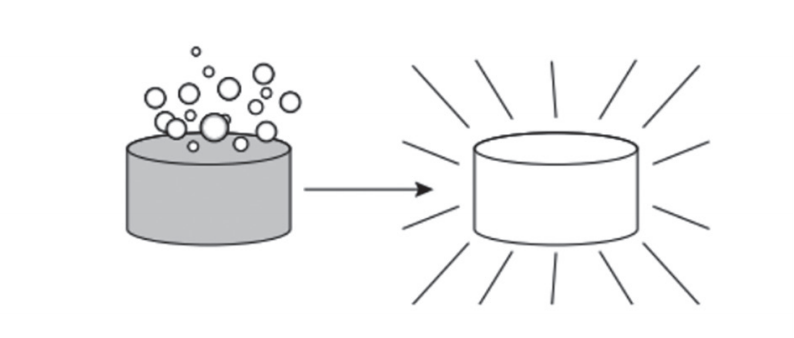

* Valores Duplicados
* Problemas nos tipos de dados
* Valores ausentes
* Outliers

##### Valores duplicados: identifique se os conjuntos de dados têm valores duplicados ou não e remova os valores duplicados. 

Um problema bem comum na análise de dados é a duplicação de dados, 
que se refere à ocorrência múltipla de instâncias de dados correspondentes às 
mesmas entidades de informações no conjunto de dados. 

In [47]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34852    False
34853    False
34854    False
34855    False
34856    False
Length: 34857, dtype: bool

In [48]:
# Verificando a quantidade de valores duplicados
sum(df.duplicated())

1

In [49]:
# Mostrando registro duplicado
df[df.duplicated()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,3.0,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [50]:
# Fazendo uma copia do dataframe sem o valor duplicado
df_NoDuplicate = df[~ df.duplicated()].copy()
# Podemos excluir a duplicidade diretamente no dataframe sem realizar a copia
# df.drop_duplicates(inplace=True)

In [51]:
# Antes de remover valores duplicados, Depois de remover valores duplicados
df.shape[0], df_NoDuplicate.shape[0]

(34857, 34856)

##### Corrigindo o tipo de dado: Verifique se todas as variáveis têm o tipo de variável correto, com base no dicionário de dados.

Os dados característicos 
em atributos encontrados numa base de dados podem ser de diferentes tipos. 

In [52]:
df_NoDuplicate.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

8  atributo do tipo  object  que muderemos para category

In [53]:
list_object_col = df_NoDuplicate.select_dtypes("object").columns.tolist()
list_object_col

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

In [54]:
# Convertendo 
df_NoDuplicate[[i for i in list_object_col]] = df_NoDuplicate[[i for i in list_object_col]].astype("category")

In [55]:
df_NoDuplicate.dtypes

Suburb           category
Address          category
Rooms               int64
Type             category
Price             float64
Method           category
SellerG          category
Date             category
Distance          float64
Postcode          float64
Bedroom2          float64
Bathroom          float64
Car               float64
Landsize          float64
BuildingArea      float64
YearBuilt         float64
CouncilArea      category
Lattitude         float64
Longtitude        float64
Regionname       category
Propertycount     float64
dtype: object

##### Tratamento de valores ausentes: verifique quais variáveis têm valores ausentes e use os tratamentos apropriados.

A falta de valores é um problema sério que pode ocorrer por diversas causas, 
como falta inesperada de dados devido a falha do dispositivo na coleta de 
dados e a falta intencional de dados devido a problemas de privacidade no preenchimento de questionários.

In [56]:
# Pegando as colunas do DataFrame
columns = df_NoDuplicate.columns
columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

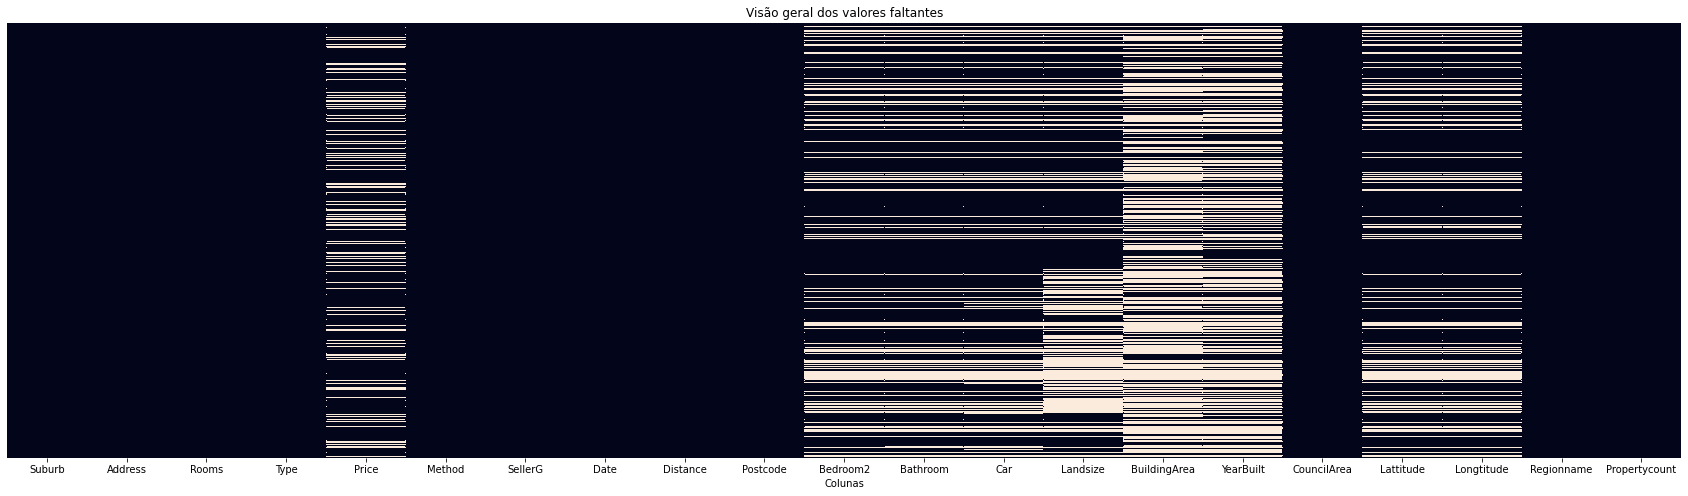

In [57]:
#Visão geral dos valores faltantes
plt.figure(figsize = (30,8))

sns.heatmap(df_NoDuplicate.isnull(),
            yticklabels = 0,
            cbar = False)

plt.title('Visão geral dos valores faltantes')
plt.xlabel('Colunas')
plt.show()

In [58]:
# Verificar atributos com dados  ausentes
df_NoDuplicate.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [59]:
df_NoDuplicate.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34856.000000,2.724700e+04,34855.000000,34855.000000,26639.000000,26630.000000,26128.000000,23046.000000,13741.000000,15550.000000,26880.000000,26880.000000,34853.000000
mean,3.031013,1.050173e+06,11.184808,3116.062430,3.084650,1.624747,1.728835,593.607177,160.251616,1965.287653,-37.810634,145.001845,7572.962901
std,0.969947,6.414671e+05,6.788952,109.025437,0.980708,0.724177,1.010789,3398.915462,401.281270,37.328340,0.090281,0.120167,4428.131940
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.000000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.000000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.000000,2000.000000,-37.754092,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,21650.000000


In [60]:
df_NoDuplicate['Bathroom'].fillna((df_NoDuplicate['Bathroom'].mode()[0]), inplace=True)# using mode
df_NoDuplicate['Bedroom2'].fillna((df_NoDuplicate['Bedroom2'].mode()[0]), inplace=True)# using mode
df_NoDuplicate['Car'].fillna((df_NoDuplicate['Car'].mode()[0]), inplace=True)# using mode
df_NoDuplicate['Landsize'].fillna(df_NoDuplicate['Landsize'].mean(), inplace=True)# using median
df_NoDuplicate["YearBuilt"].fillna((df_NoDuplicate["YearBuilt"].mode()[0]), inplace=True)# using mode
df_NoDuplicate[["Bedroom2","Bathroom","Car","Landsize","YearBuilt"]]

,Bedroom2,Bathroom,Car,Landsize,YearBuilt
0,2.0,1.0,1.0,126.000000,1970.0
1,2.0,1.0,1.0,202.000000,1970.0
2,2.0,1.0,0.0,156.000000,1900.0
3,3.0,2.0,1.0,0.000000,1970.0
4,3.0,2.0,0.0,134.000000,1900.0
...,...,...,...,...,...
34852,4.0,1.0,3.0,593.000000,1970.0
34853,2.0,2.0,1.0,98.000000,2018.0
34854,2.0,1.0,2.0,220.000000,2000.0
34855,3.0,1.0,2.0,593.607177,1970.0


In [61]:
df_NoDuplicate.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2             0
Bathroom             0
Car                  0
Landsize             0
BuildingArea     21115
YearBuilt            0
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [62]:
df_NoDuplicate.dropna(subset=['CouncilArea','Lattitude', 'Longtitude', 'Regionname','BuildingArea' ], inplace=True)

In [63]:
df_NoDuplicate.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            3085
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [64]:
df_NoDuplicate.drop(columns=['SellerG', 'Date', 'Propertycount'], inplace=True)

In [65]:
df_NoDuplicate.isnull().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price           3085
Method             0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea       0
YearBuilt          0
CouncilArea        0
Lattitude          0
Longtitude         0
Regionname         0
dtype: int64

In [66]:
df_drop_NanPrice = df_NoDuplicate[~ df_NoDuplicate['Price'].isnull()].copy()
df_drop_NanPrice.isnull().sum()

Suburb          0
Address         0
Rooms           0
Type            0
Price           0
Method          0
Distance        0
Postcode        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
CouncilArea     0
Lattitude       0
Longtitude      0
Regionname      0
dtype: int64

In [67]:
df_drop_NanPrice.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,10647.000000,1.064700e+04,10647.000000,10647.000000,10647.000000,10647.000000,10647.000000,10647.000000,10647.000000,10647.000000,10647.000000,10647.000000
mean,3.107448,1.087430e+06,11.489612,3115.619799,3.089133,1.658495,1.714943,535.389363,156.862153,1966.501362,-37.804731,144.991640
std,0.960378,6.773185e+05,7.128466,122.081617,0.962592,0.719308,0.963443,1137.205036,449.409061,36.569952,0.093775,0.123402
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.185600,144.423790
25%,3.000000,6.400000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,236.000000,100.000000,1950.000000,-37.859765,144.919500
50%,3.000000,8.950000e+05,10.400000,3084.000000,3.000000,2.000000,2.000000,540.000000,133.000000,1970.000000,-37.798800,144.998900
75%,4.000000,1.330000e+06,14.300000,3153.000000,4.000000,2.000000,2.000000,629.000000,182.000000,2000.000000,-37.747800,145.066665
max,12.000000,9.000000e+06,48.100000,3978.000000,12.000000,9.000000,10.000000,44500.000000,44515.000000,2019.000000,-37.397800,145.526350


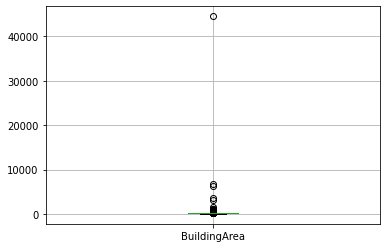

In [68]:
boxplot = df_drop_NanPrice.boxplot(column=['BuildingArea'])

In [69]:
df_drop_NanPrice[df_drop_NanPrice['BuildingArea']==0]

,Suburb,Address,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
7211,North Melbourne,19 Shands La,2,t,841000.0,S,2.3,3051.0,2.0,1.0,1.0,215.0,0.0,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,9.7,3104.0,5.0,3.0,2.0,743.0,0.0,1949.0,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,12.1,3083.0,3.0,1.0,2.0,542.0,0.0,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan
20223,Roxburgh Park,16 Sandover Dr,4,h,570000.0,S,20.6,3064.0,4.0,2.0,2.0,504.0,0.0,2000.0,Hume City Council,-37.61419,144.93448,Northern Metropolitan
20262,Thornbury,19/337 Station St,3,t,900000.0,VB,7.0,3071.0,3.0,2.0,2.0,120.0,0.0,2000.0,Darebin City Council,-37.76343,145.02096,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32403,Roxburgh Park,23 Wrigley Cr,4,h,622000.0,S,20.6,3064.0,4.0,2.0,1.0,530.0,0.0,1998.0,Hume City Council,-37.62352,144.93133,Northern Metropolitan
32936,Wollert,42 Rhone Dr,4,h,722500.0,S,25.5,3750.0,4.0,2.0,2.0,512.0,0.0,1970.0,Whittlesea City Council,-37.61971,145.02910,Northern Metropolitan
33397,Greenvale,26 Perugia Av,4,h,677000.0,S,20.4,3059.0,4.0,2.0,2.0,312.0,0.0,2013.0,Hume City Council,-37.62439,144.88629,Northern Metropolitan
33660,Preston,91 Dundas St,3,h,950000.0,PI,8.4,3072.0,3.0,1.0,2.0,301.0,0.0,1935.0,Darebin City Council,-37.75302,145.00948,Northern Metropolitan


In [70]:
# Remove outlier
df_drop_NanPrice = df_drop_NanPrice[df_drop_NanPrice['BuildingArea']!=0]
df_drop_NanPrice[df_drop_NanPrice['BuildingArea']==0]

,Suburb,Address,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname


In [71]:
df_NanPrice = df_NoDuplicate[ df_NoDuplicate['Price'].isnull()].copy()

In [72]:
X_train = df_drop_NanPrice[["Distance","Bedroom2" , "Bathroom","Car" , "Landsize" , "YearBuilt"]]
Y_train = df_drop_NanPrice["Price"]
X_test = df_NanPrice[["Distance","Bedroom2" , "Bathroom","Car" , "Landsize" , "YearBuilt"]]

X_train.shape , Y_train.shape , X_test.shape

((10586, 6), (10586,), (3085, 6))

# 2. Prorcessamento com Biosinais

##### **Pequena descricao sobre a base:**

Conjunto de dados de saúde para a detecção não invasiva de doenças cardiovasculares (DCV), contém 657 registros de dados de 219 indivíduos. O conjunto de dados cobre uma faixa etária de 20 a 89 anos e registros de doenças, incluindo hipertensão e diabetes. A aquisição de dados foi realizada sob o controle de especificações e condições experimentais padrão. Este dados podem ser usados para realizar o estudo da avaliação da qualidade do sinal do fotopletismógrafo (PPG) e para explorar a relação intrínseca entre a forma de onda do PPG e a doença cardiovascular para descobrir e avaliar as informações características latentes contidas nos sinais do PPG. [Link para baixar a base](https://figshare.com/articles/dataset/PPG-BP_Database_zip/5459299).

Esses dados também podem ser usados ​​para estudar a triagem precoce e não invasiva de doenças cardiovasculares comuns, como hipertensão e outras doenças cardiovasculares relacionadas, como diabetes. Mais informações sobre a base: https://www.nature.com/articles/sdata201820

#### 2.1. Carregar os dados

In [73]:
!gdown https://drive.google.com/uc?id=1CmHqgNRIKa9AbP8o-Rs9HghQuW8Qfgqz && unzip PPGBPDatabase_China.zip

In [74]:
df_ref = pd.read_excel("/content/Data File/PPG-BP dataset.xlsx", header=1)
df_ref

,Num.,subject_ID,Sex(M/F),Age(year),Height(cm),Weight(kg),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,Diabetes,cerebral infarction,cerebrovascular disease
0,1,2,Female,45,152,63,161,89,97,27.268006,Stage 2 hypertension,NaN,NaN,NaN
1,2,3,Female,50,157,50,160,93,76,20.284799,Stage 2 hypertension,NaN,NaN,NaN
2,3,6,Female,47,150,47,101,71,79,20.888889,Normal,NaN,NaN,NaN
3,4,8,Male,45,172,65,136,93,87,21.971336,Prehypertension,NaN,NaN,NaN
4,5,9,Female,46,155,65,123,73,73,27.055151,Prehypertension,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,215,415,Male,24,180,70,111,70,77,21.604938,Normal,NaN,NaN,NaN
215,216,416,Female,25,156,47,93,57,79,19.312952,Normal,NaN,NaN,NaN
216,217,417,Male,25,176,55,120,69,72,17.755682,Prehypertension,NaN,NaN,NaN
217,218,418,Male,25,173,63,106,69,67,21.049818,Normal,NaN,NaN,NaN


#### 2.2 Apresentação dos dados de apenas uma pessoa

In [75]:
def plot_ppg(data, titulo=None):
  '''
  Retorning avoid
    Parameters:
      data (int): array of integers
    Returns:
      Nothing
  '''
  plt.figure(figsize=(16,5), dpi=200)
  plt.plot(data, color='blue',label="Sinal PPG")
  plt.title(titulo)
  plt.xlabel("Amostras")
  plt.ylabel('Amplitude')
  plt.legend()
  plt.show()

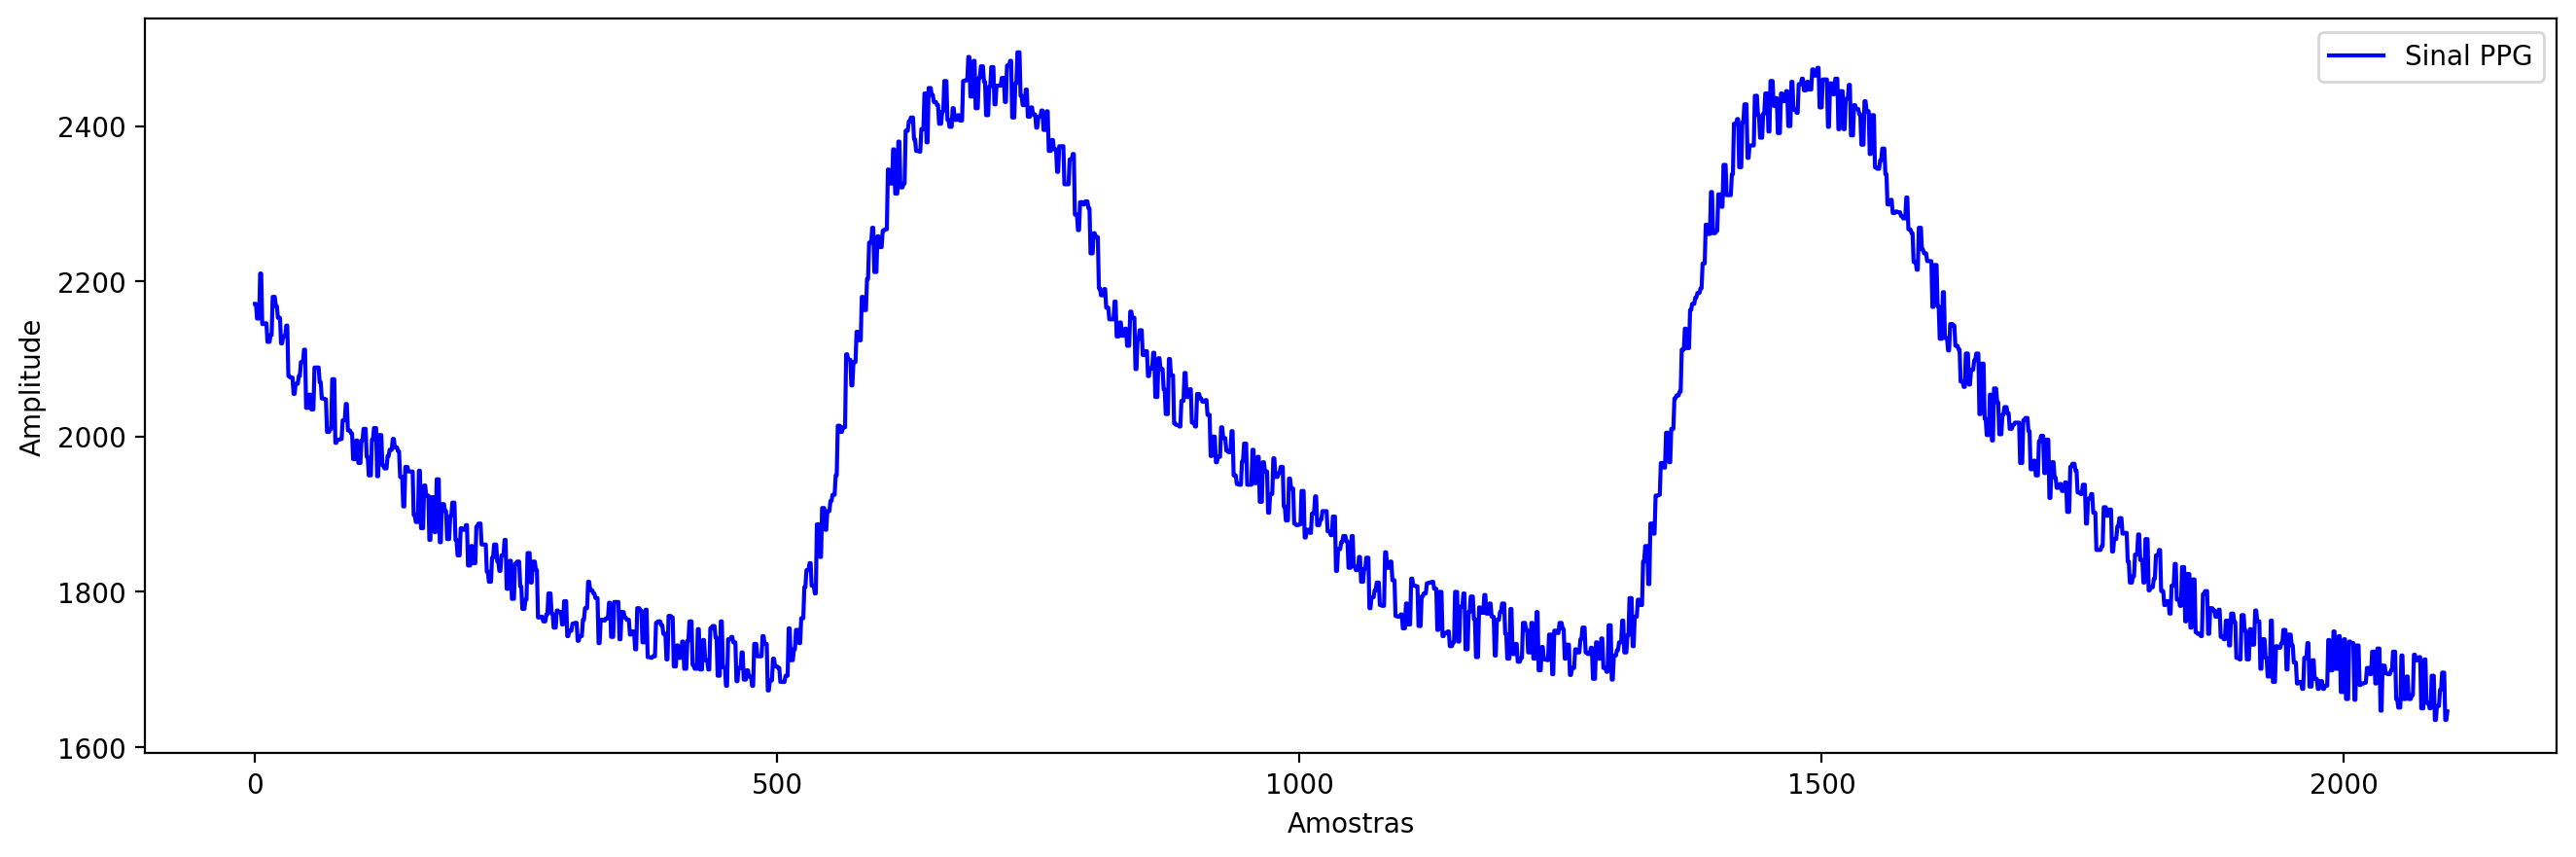

In [76]:
data_1 = np.loadtxt("Data File/0_subject/111_1.txt")
data_2 = np.loadtxt("Data File/0_subject/111_2.txt")
data_3 = np.loadtxt("Data File/0_subject/111_3.txt")
plot_ppg(data_1)

In [77]:
# unindo todas as sequências e apresentando as sequências
data_res = np.concatenate([data_1, data_2, data_3])

In [78]:
data_res

array([2171., 2171., 2152., ..., 2283., 2283., 2278.])

In [79]:
# apresentando o formato
data_res.shape

(6300,)

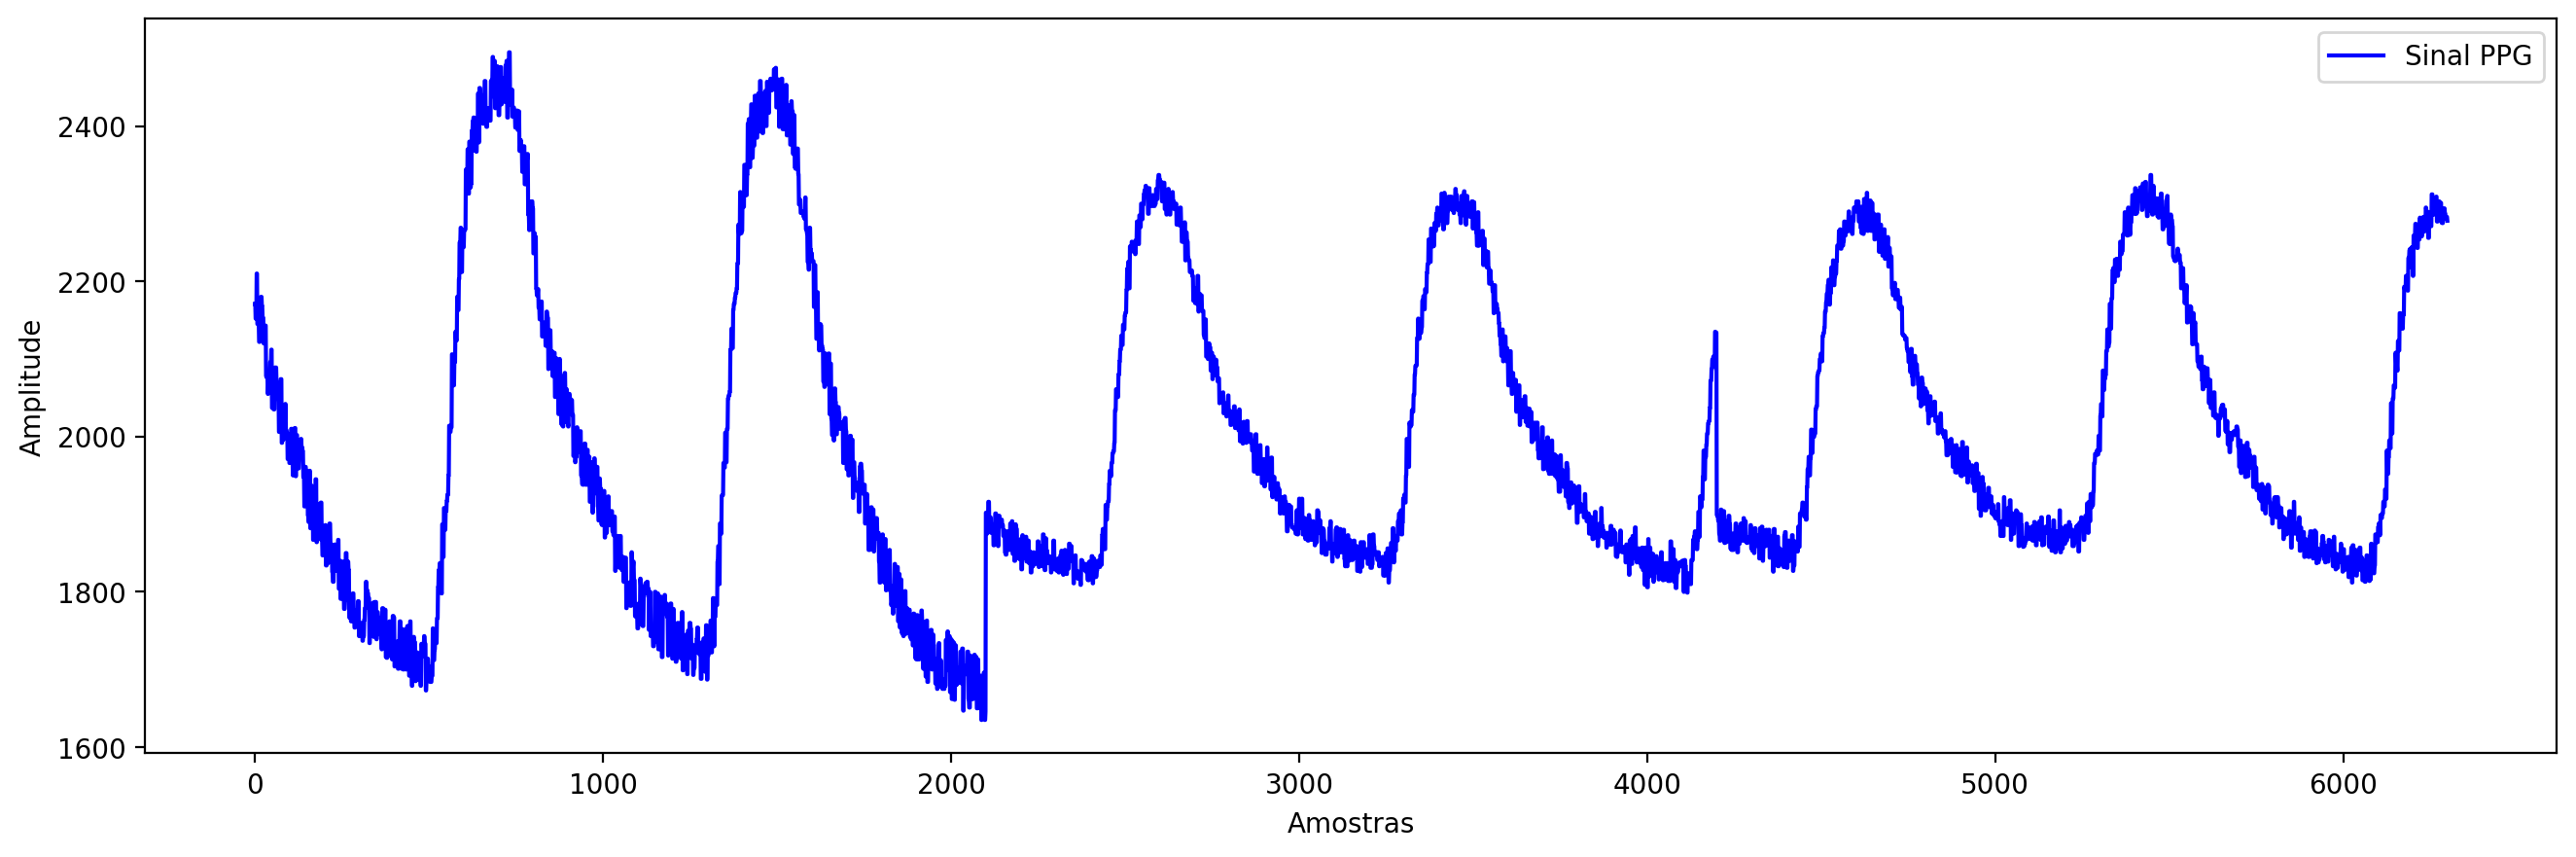

In [80]:
plot_ppg(data_res)

#### 2.3 Relacionar os sinais aos rótulos de cada pessoa

In [81]:
list_ids, list_labels = df_ref.loc[:, 'subject_ID'].values, df_ref.loc[:, 'Hypertension'].values
list_ids.shape, list_labels.shape

((219,), (219,))

In [82]:
list_ids

array([  2,   3,   6,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  21,  22,  23,  24,  25,  26,  27,  29,  30,  31,  32,
        34,  35,  38,  40,  41,  43,  45,  47,  48,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  60,  61,  62,  63,  64,  65,  66,  67,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  95,  96,
        97,  98,  99, 100, 103, 104, 105, 106, 107, 108, 110, 111, 112,
       113, 114, 115, 116, 119, 120, 122, 123, 124, 125, 126, 127, 128,
       130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145,
       146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160,
       161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174,
       175, 176, 178, 179, 180, 182, 183, 184, 185, 186, 188, 189, 190,
       191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 226, 227, 228, 229, 230, 231, 23

In [83]:
list_labels

array(['Stage 2 hypertension', 'Stage 2 hypertension', 'Normal',
       'Prehypertension', 'Prehypertension', 'Prehypertension',
       'Prehypertension', 'Normal', 'Normal', 'Normal', 'Prehypertension',
       'Prehypertension', 'Normal', 'Normal', 'Normal',
       'Stage 2 hypertension', 'Prehypertension', 'Normal', 'Normal',
       'Stage 2 hypertension', 'Prehypertension', 'Normal',
       'Prehypertension', 'Stage 2 hypertension', 'Stage 2 hypertension',
       'Normal', 'Prehypertension', 'Stage 1 hypertension',
       'Stage 1 hypertension', 'Normal', 'Normal', 'Stage 1 hypertension',
       'Stage 2 hypertension', 'Prehypertension', 'Stage 1 hypertension',
       'Stage 1 hypertension', 'Stage 2 hypertension', 'Normal', 'Normal',
       'Prehypertension', 'Prehypertension', 'Normal', 'Prehypertension',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Prehypertension', 'Normal', 'Normal', 'Normal',
       'Stage 2 hypertension', 'Normal', 'Stage 1 hypertension',


In [84]:
# lista que armazenará os DataFranes temporários para concatenação
list_dfs = []

# loop para percorrer na lista de subjects -> 
# poderia serfeito da seguinte forma assim -> df_ref[df_ref['subject_ID'] == subject]['Hypertension'].values[0]
for ids, subject in enumerate(list_ids):
  
  # encontra os arquivos do subject e armazena numa lista de forma ordenada 
  files_sub = sorted(glob('Data File/0_subject/'+str(subject)+'_*'))
  list_sub = []

  # Lemos cada arquivo por meio da função np.loadtxt() e add numa lista
  for sub_ppg in files_sub:
    ppg = np.loadtxt(sub_ppg)
    list_sub.append(ppg)
    
  # concatenamos os valores no eixo X e invertemos a orientação
  ppg_sub = np.concatenate(list_sub, axis=0).reshape(1,-1)

  # criamos um dataframe com as informações e o adicionamos numa lista
  df = pd.DataFrame({"Subject_ID" : subject, "PPG" : ppg_sub.tolist(), "label" : list_labels[ids]})
  list_dfs.append(df)

# com os DFs presentes na lista, basta concatená-los
df_final = pd.concat(list_dfs)

In [85]:
df_final

,Subject_ID,PPG,label
0,2,"[2438.0, 2438.0, 2438.0, 2455.0, 2455.0, 2384....",Stage 2 hypertension
0,3,"[1973.0, 1973.0, 1990.0, 1990.0, 1979.0, 1979....",Stage 2 hypertension
0,6,"[2003.0, 2003.0, 1978.0, 1978.0, 1978.0, 1993....",Normal
0,8,"[2039.0, 2039.0, 2039.0, 2029.0, 2029.0, 2042....",Prehypertension
0,9,"[1961.0, 1971.0, 1971.0, 1971.0, 1964.0, 1964....",Prehypertension
...,...,...,...
0,415,"[2339.0, 2367.0, 2386.0, 2378.0, 2411.0, 2407....",Normal
0,416,"[3086.0, 3086.0, 3007.0, 2943.0, 2947.0, 2951....",Normal
0,417,"[3146.0, 3166.0, 3091.0, 3134.0, 3082.0, 3083....",Prehypertension
0,418,"[2431.0, 2403.0, 2394.0, 2431.0, 2427.0, 2419....",Normal


##### Reseta o index do *dataframe*

In [86]:
df_final.reset_index(drop=True, inplace=True) 
df_final

,Subject_ID,PPG,label
0,2,"[2438.0, 2438.0, 2438.0, 2455.0, 2455.0, 2384....",Stage 2 hypertension
1,3,"[1973.0, 1973.0, 1990.0, 1990.0, 1979.0, 1979....",Stage 2 hypertension
2,6,"[2003.0, 2003.0, 1978.0, 1978.0, 1978.0, 1993....",Normal
3,8,"[2039.0, 2039.0, 2039.0, 2029.0, 2029.0, 2042....",Prehypertension
4,9,"[1961.0, 1971.0, 1971.0, 1971.0, 1964.0, 1964....",Prehypertension
...,...,...,...
214,415,"[2339.0, 2367.0, 2386.0, 2378.0, 2411.0, 2407....",Normal
215,416,"[3086.0, 3086.0, 3007.0, 2943.0, 2947.0, 2951....",Normal
216,417,"[3146.0, 3166.0, 3091.0, 3134.0, 3082.0, 3083....",Prehypertension
217,418,"[2431.0, 2403.0, 2394.0, 2431.0, 2427.0, 2419....",Normal


#### 2.4 Pré-processamento

##### 2.4.1 Aplicar Downsample

In [87]:
list_ppg = []
for i in range(len(df_final['Subject_ID'])):
  ppg = df_final['PPG'][i]
  number_of_samples = round(len(ppg) * float(125) / 1000)
  ppg_resample = scipy.signal.resample(ppg, number_of_samples)
  list_ppg.append(ppg_resample)

# adição da coluna PPG_re "sem avisos do pandas"
df_final = df_final.assign(PPG_re = list_ppg)

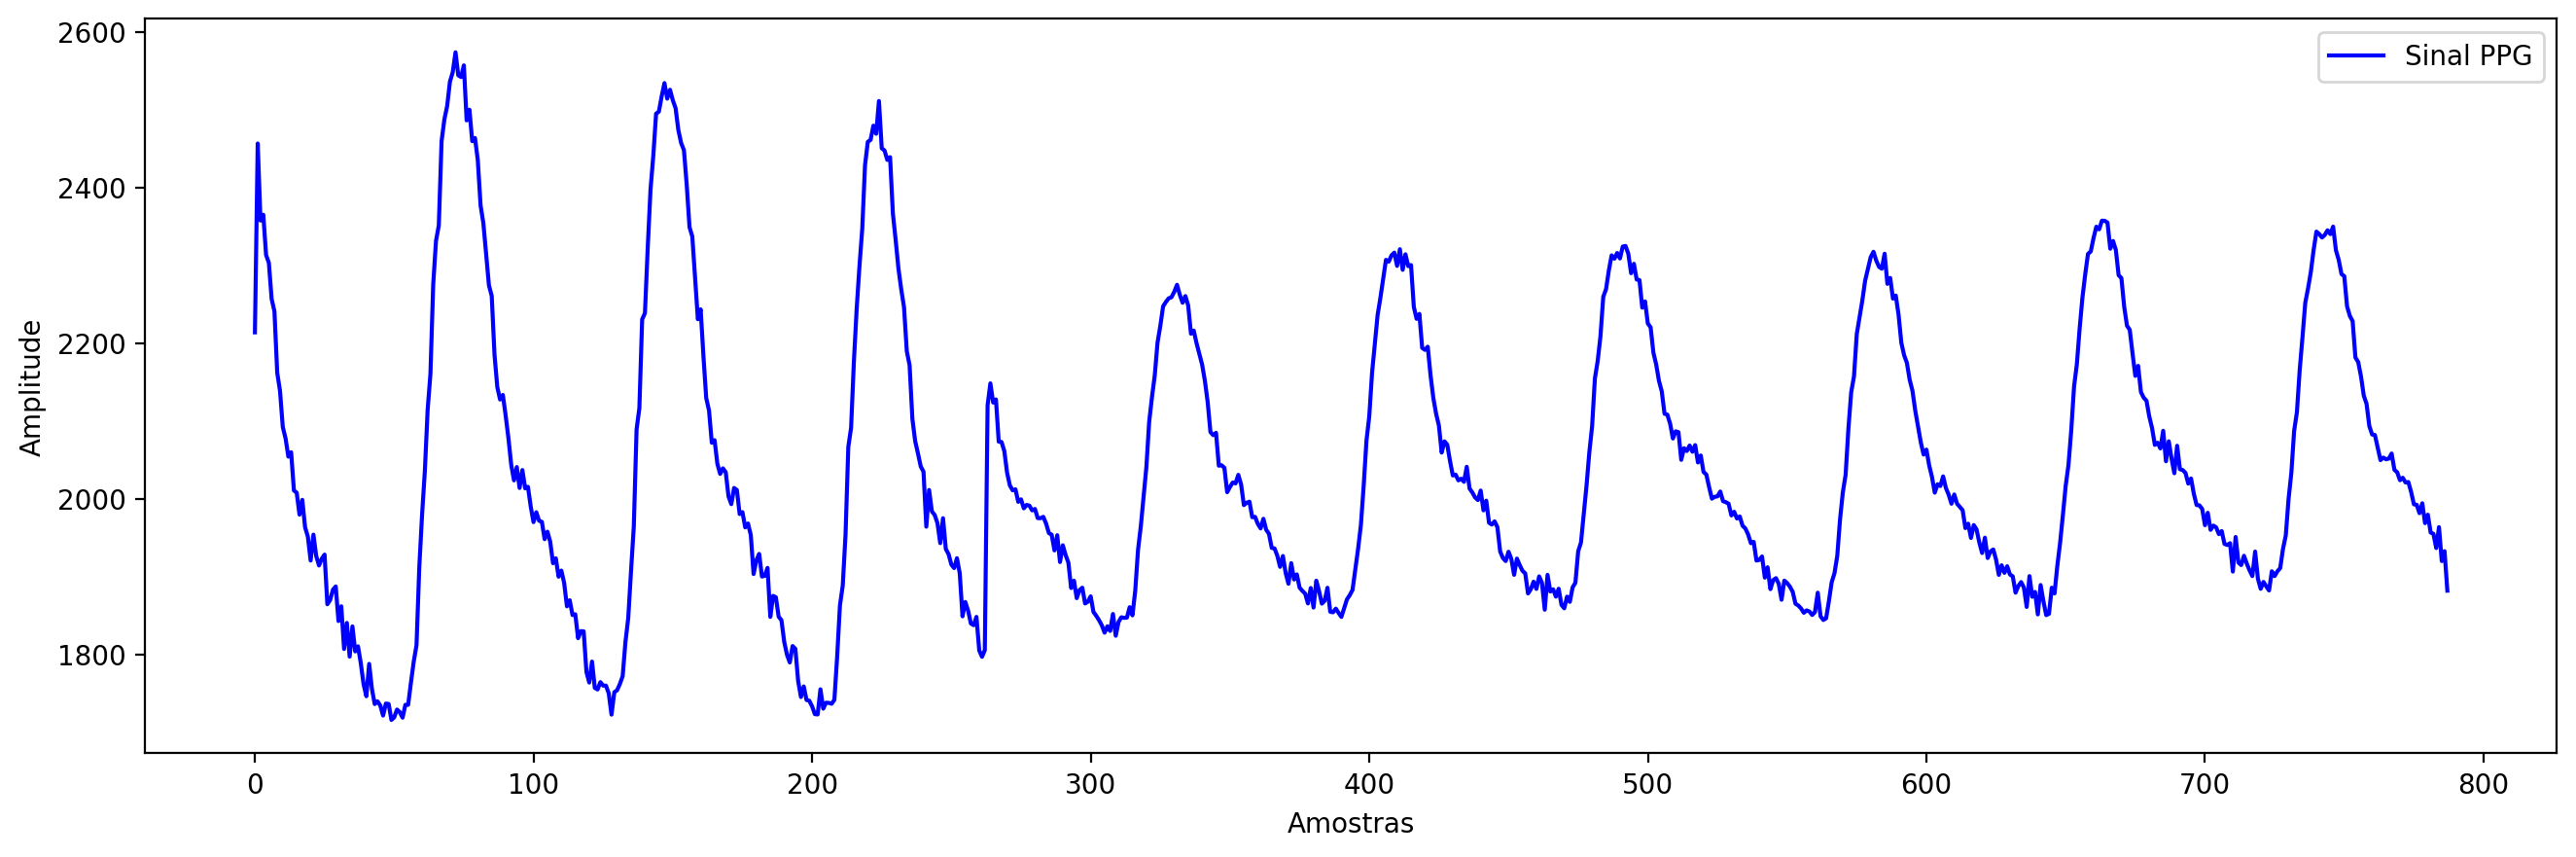

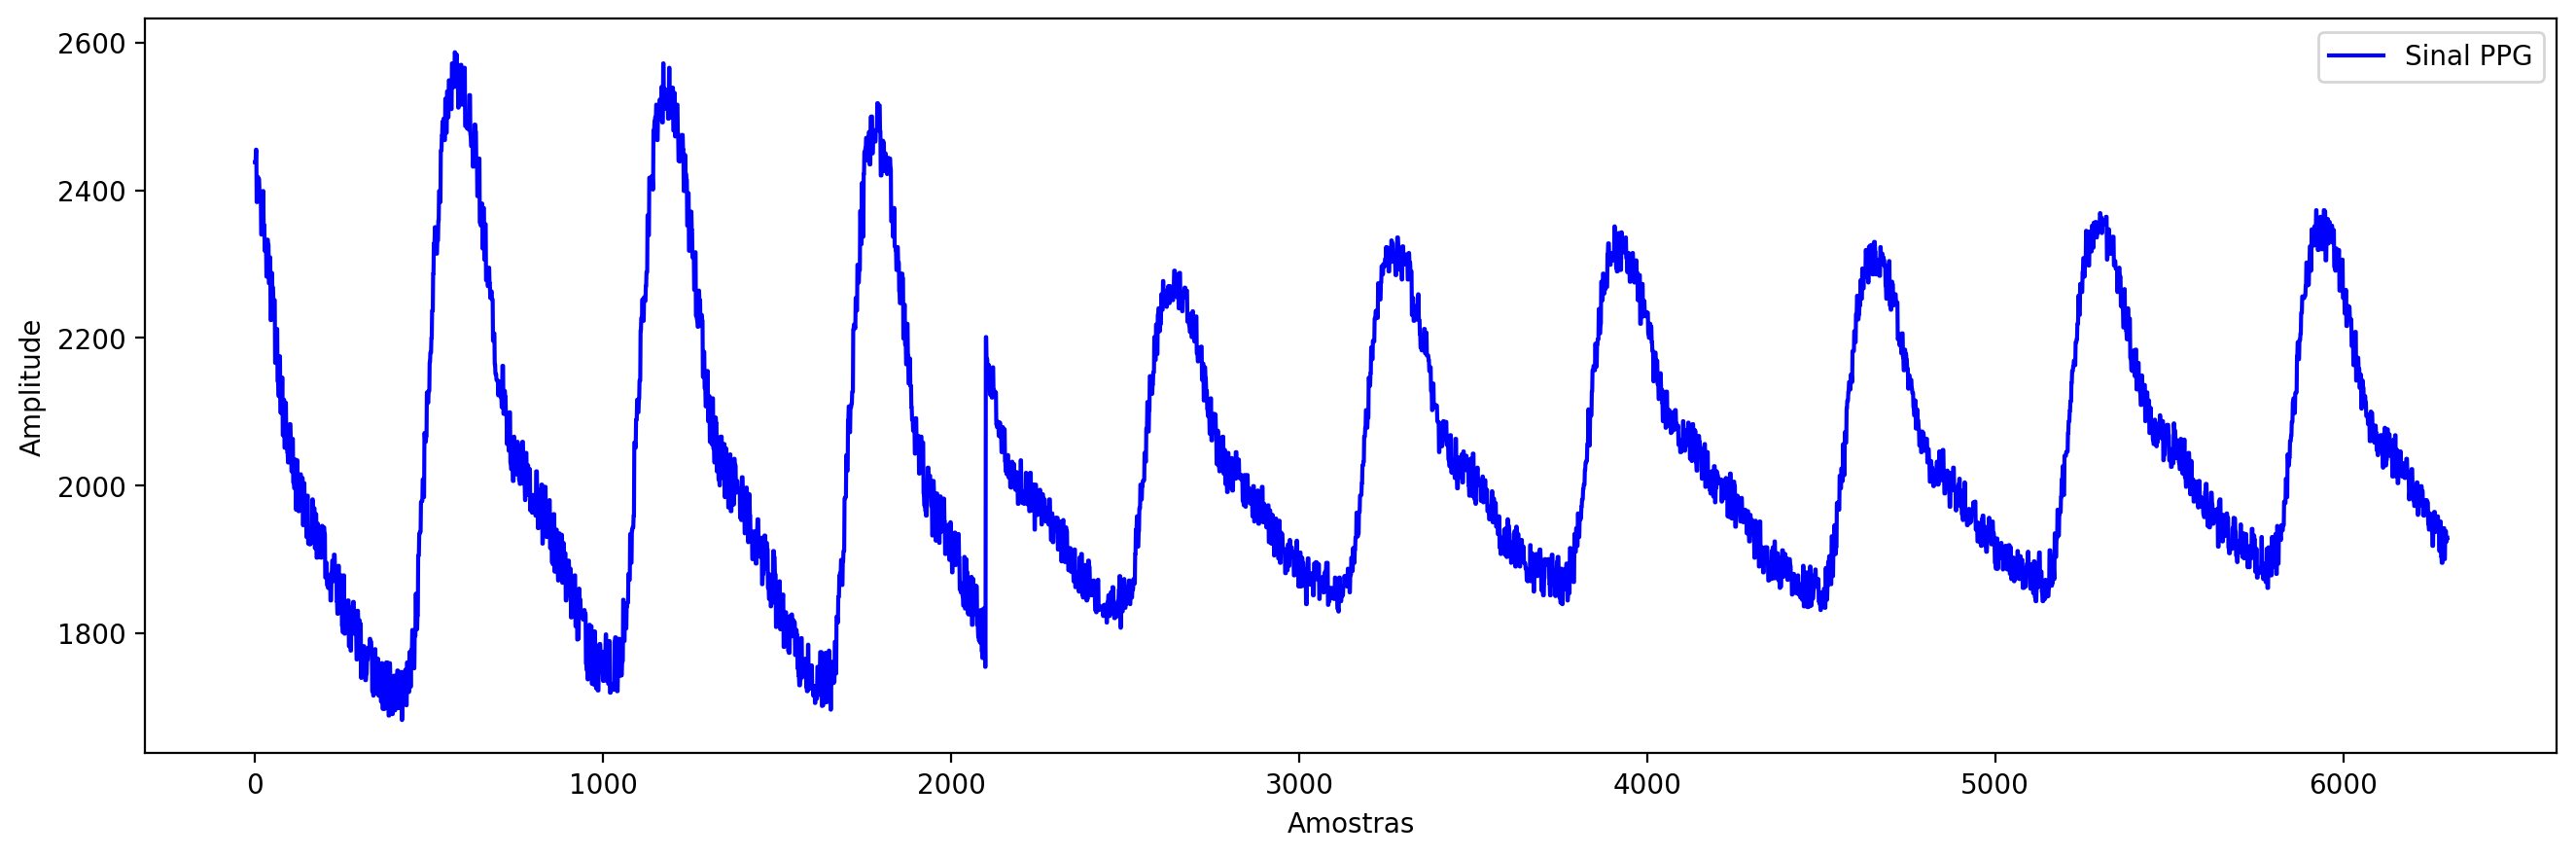

In [88]:
plot_ppg(df_final.PPG_re[0])
plot_ppg(df_final.PPG[0])

In [89]:
df_final.head()

,Subject_ID,PPG,label,PPG_re
0,2,"[2438.0, 2438.0, 2438.0, 2455.0, 2455.0, 2384....",Stage 2 hypertension,"[2213.7846332140125, 2456.539814661412, 2357.4..."
1,3,"[1973.0, 1973.0, 1990.0, 1990.0, 1979.0, 1979....",Stage 2 hypertension,"[1991.1495405900525, 1969.2166038703729, 1966...."
2,6,"[2003.0, 2003.0, 1978.0, 1978.0, 1978.0, 1993....",Normal,"[2070.393256046045, 1971.5884271591292, 1995.2..."
3,8,"[2039.0, 2039.0, 2039.0, 2029.0, 2029.0, 2042....",Prehypertension,"[2032.8301164967734, 2033.3854553035292, 2034...."
4,9,"[1961.0, 1971.0, 1971.0, 1971.0, 1964.0, 1964....",Prehypertension,"[1963.904065698714, 1978.6419080767303, 1985.1..."


##### 2.4.2 Filtro

<div>
<img src="https://www.biorxiv.org/content/biorxiv/early/2019/08/08/722397/F5.large.jpg" width="600"/>
</div>

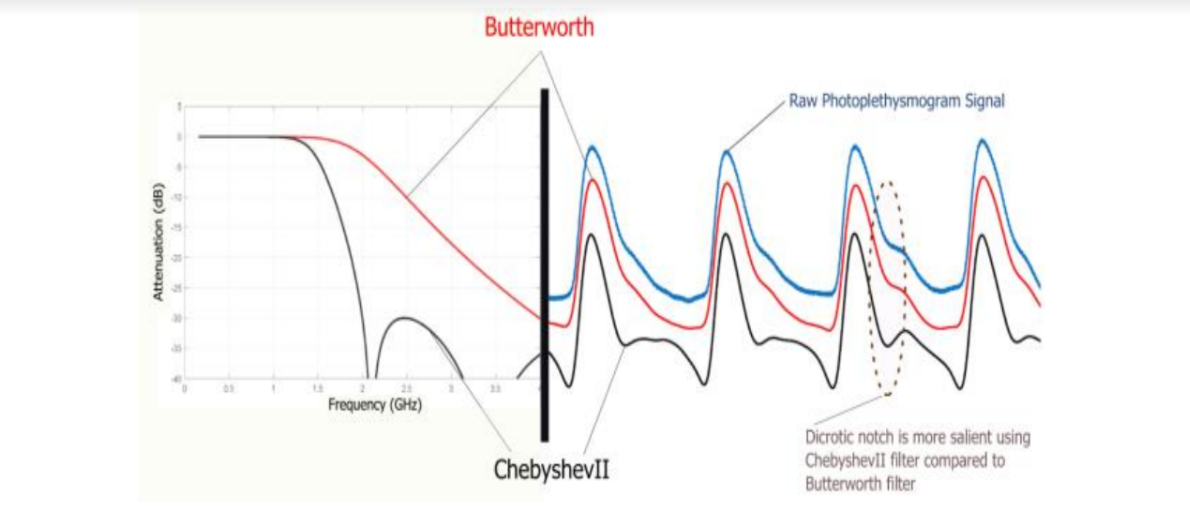Imagem dos Filtros

In [90]:
!pip install biosppy

     |████████████████████████████████| 92kB 2.8MB/s 
  Created wheel for biosppy: filename=biosppy-0.7.2-py2.py3-none-any.whl size=102114 sha256=3b7c37349dc4b5f9892d28fb7d8600b4033b81dc79c8346a1b3ac31f6e9b05c6
  Stored in directory: /root/.cache/pip/wheels/d0/0e/02/dd0b824808011222a59dde4a30a4966a4a61f33360a619ac7a
Successfully built biosppy


In [91]:
from biosppy.signals import tools as tools

In [92]:
def ButterWorth(signal, sampling_rate):
  '''
  Returning a filtered signal through ButterWorth filter
    Parameters:
      data (int): array of integers
      sampling_rate (int) : int
    Returns:
      array: returning value 
  '''
  signal = np.array(signal)
  sampling_rate = float(sampling_rate)
  filtered, _, _ = tools.filter_signal(signal=signal,
                                ftype='butter',
                                band='bandpass',
                                order=4,
                                frequency=[1, 8],
                                sampling_rate=sampling_rate)
  return filtered

def ChebyshevII(signal_raw):
  ### Adicione o filtro de quarta ordem de Chebyshev II Filter - Liang2018
  '''
    Returning a filtered signal through Chebyshev II Filter
    Parameters:
      data (int): array of integers
      sampling_rate (int) : int
    Returns:
      array: returning value 
  '''
  order = 4; 
  fl = 0.5;
  fH = 10;
  Fs = 60;
  Fn = Fs /2 ;
  sos = signal.cheby2(order,20,Wn =np.array([fl/Fn, fH/Fn]), fs = Fs, output='sos', btype="bandpass")
  filtered = signal.sosfiltfilt(sos, raw,axis=-1,padtype=None)

  ppgMax = max(filtered)
  ppgMin = min(filtered)
  cheby_filtered_ppg = (filtered - ppgMin) / (ppgMax - ppgMin)
  return cheby_filtered_ppg

Aplicação do Filtro de ButterWorth

In [93]:
list_ppg_filter = []
for ppg_re in df_final['PPG_re'].values:
  # adiciona à lista abaixo amostras completas de uma pessoa na 
  # freq. de 125Hz
  list_ppg_filter.append(ButterWorth(ppg_re, 125))
df_final = df_final.assign(PPG_butter = list_ppg_filter)

In [94]:
df_final.head()

,Subject_ID,PPG,label,PPG_re,PPG_butter
0,2,"[2438.0, 2438.0, 2438.0, 2455.0, 2455.0, 2384....",Stage 2 hypertension,"[2213.7846332140125, 2456.539814661412, 2357.4...","[34.0966101593838, 72.09079617241342, 105.9992..."
1,3,"[1973.0, 1973.0, 1990.0, 1990.0, 1979.0, 1979....",Stage 2 hypertension,"[1991.1495405900525, 1969.2166038703729, 1966....","[-4.236941968623845, -10.472358870428755, -16...."
2,6,"[2003.0, 2003.0, 1978.0, 1978.0, 1978.0, 1993....",Normal,"[2070.393256046045, 1971.5884271591292, 1995.2...","[4.783050805797863, -13.950867831397167, -31.2..."
3,8,"[2039.0, 2039.0, 2039.0, 2029.0, 2029.0, 2042....",Prehypertension,"[2032.8301164967734, 2033.3854553035292, 2034....","[-9.52317327379029, -11.391753761103871, -13.3..."
4,9,"[1961.0, 1971.0, 1971.0, 1971.0, 1964.0, 1964....",Prehypertension,"[1963.904065698714, 1978.6419080767303, 1985.1...","[-9.014673188649088, -8.418368308748565, -8.01..."


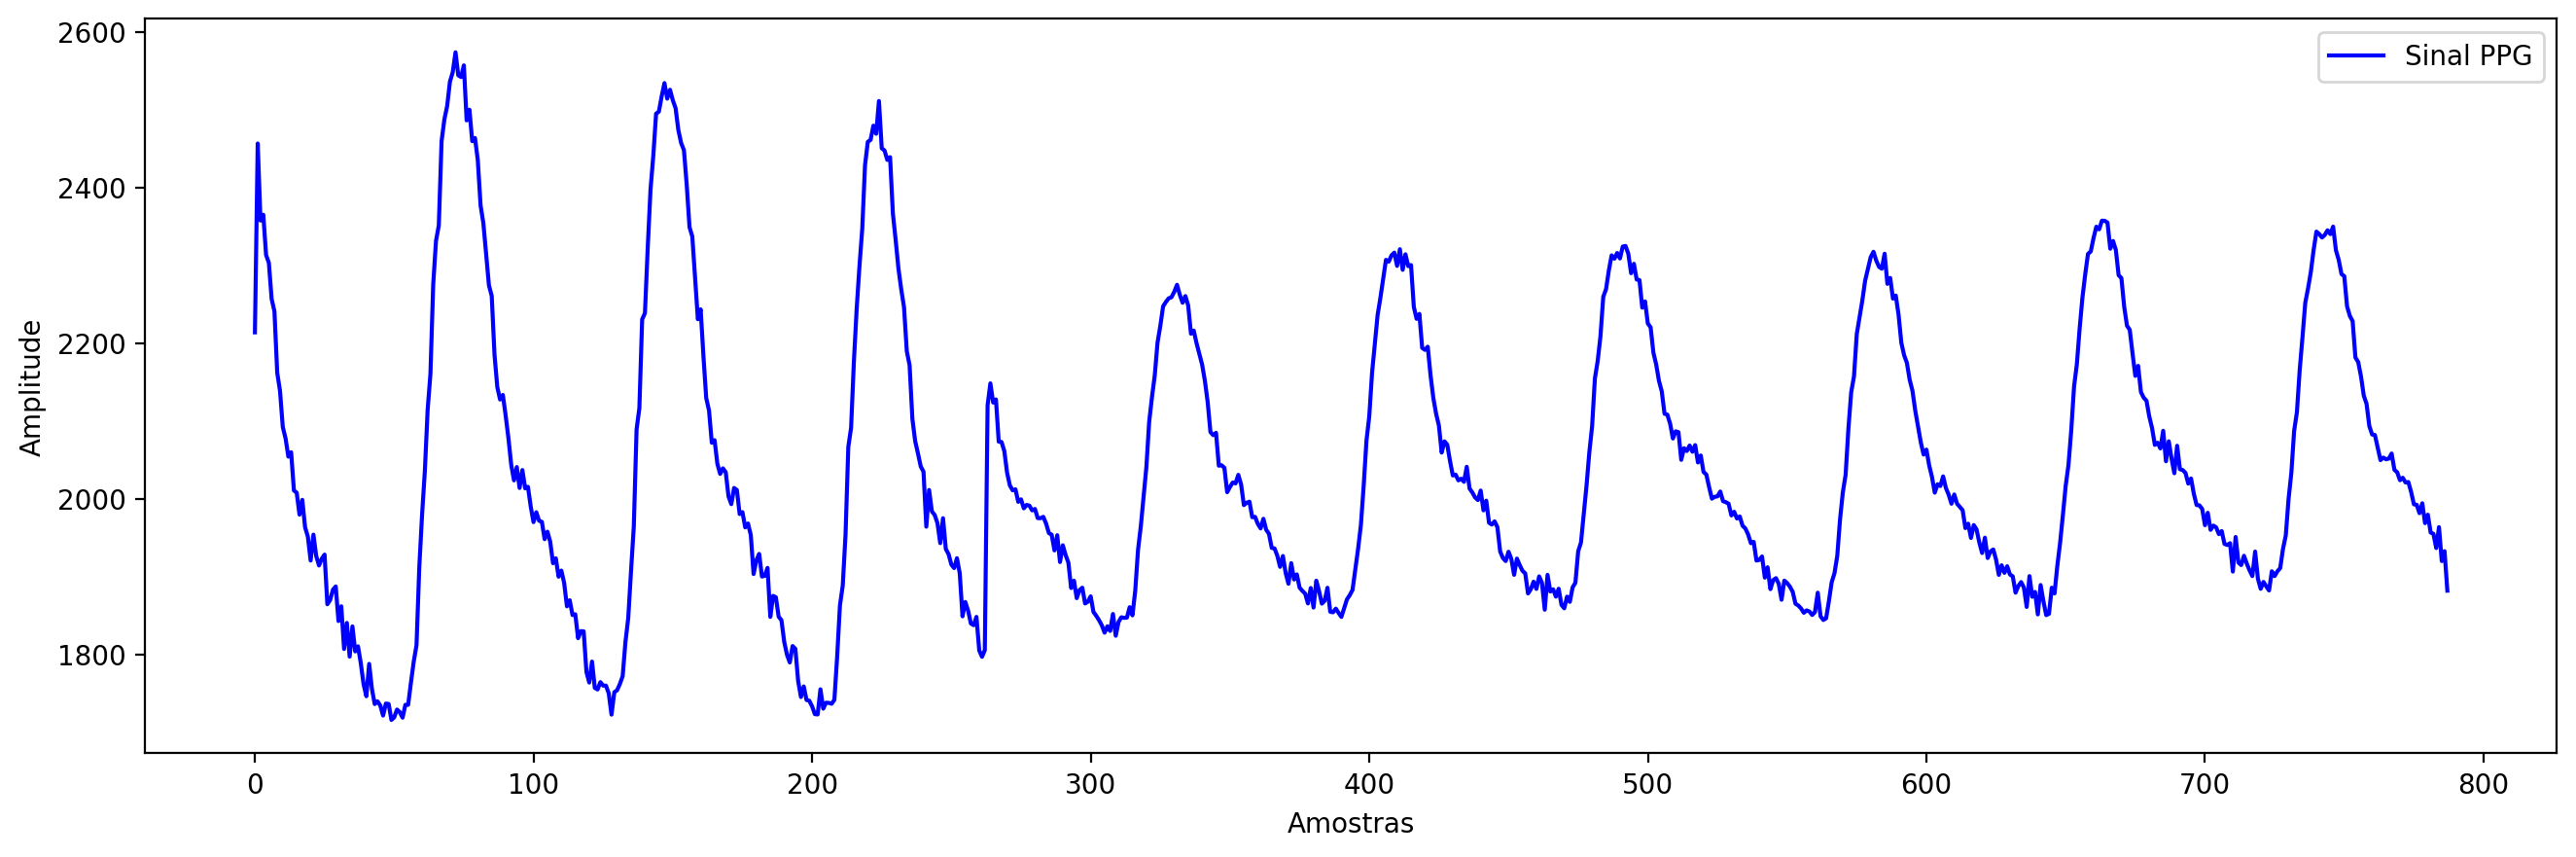

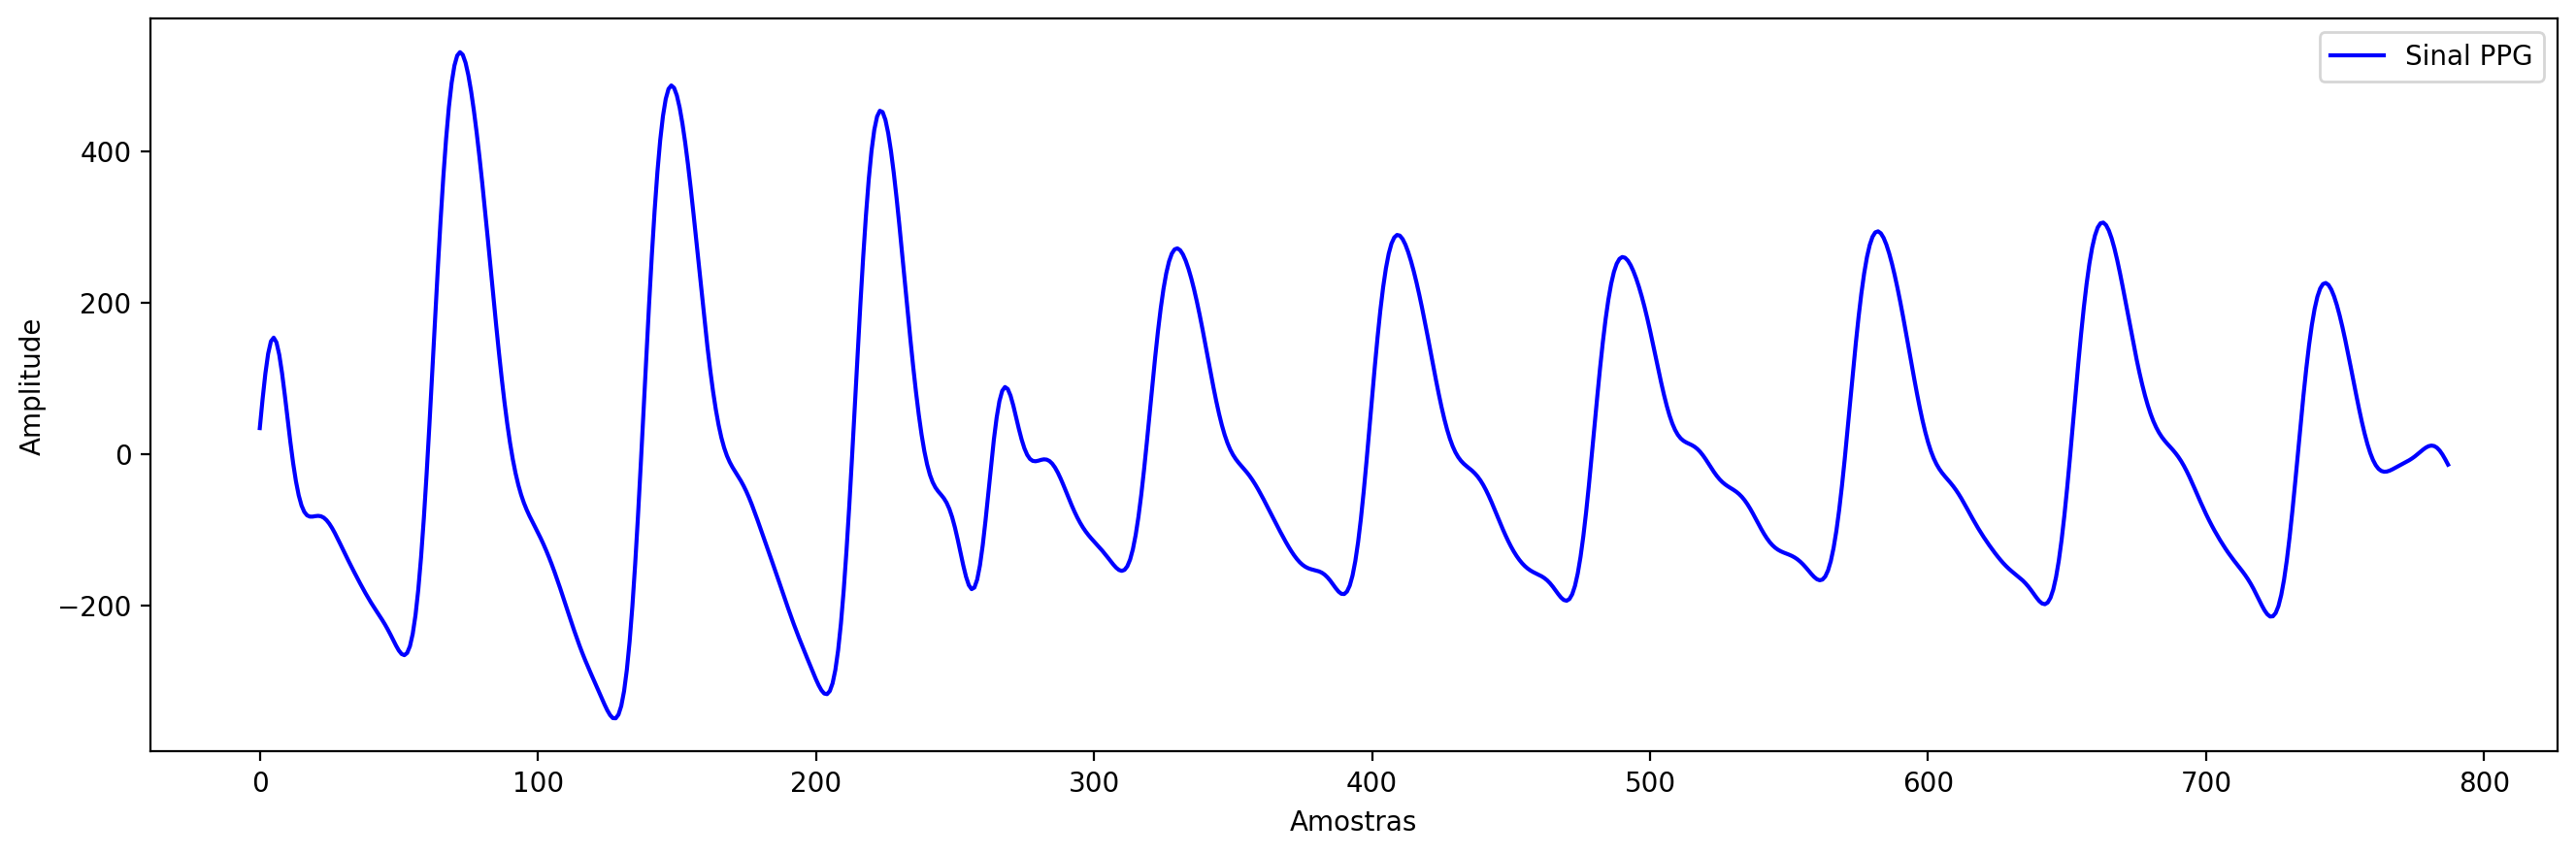

In [95]:
plot_ppg(df_final.PPG_re[0])
plot_ppg(df_final.PPG_butter[0])

##### 2.4.3 Janelamento

In [96]:
def make_window(signal, fs, overlap, window_size_sec):
  window_size = fs * window_size_sec
  overlap     = int(window_size * (overlap / 100))
  start       = 0   
  segmented   = np.zeros((1, window_size), dtype = int)
  while(start+window_size <= len(signal)):
      segment     = signal[start:start+window_size]
      segment     = segment.reshape(1, len(segment))
      segmented   = np.append(segmented, segment, axis =0)
      start       = start + window_size - overlap
  return segmented[1:]

In [97]:
lista_ppg_seg = []
for i in range(len(df_final['Subject_ID'])):
  ppg = df_final['PPG_butter'][i]
  ppg = stats.zscore(ppg)
  ppg = make_window(ppg,125,10,3)
  #Realizando a normalização do segmento
  lista_ppg_seg.append(ppg)
# adição da coluna PPG_re "sem avisos do panda"
df_final = df_final.assign(PPG_Seg = lista_ppg_seg)

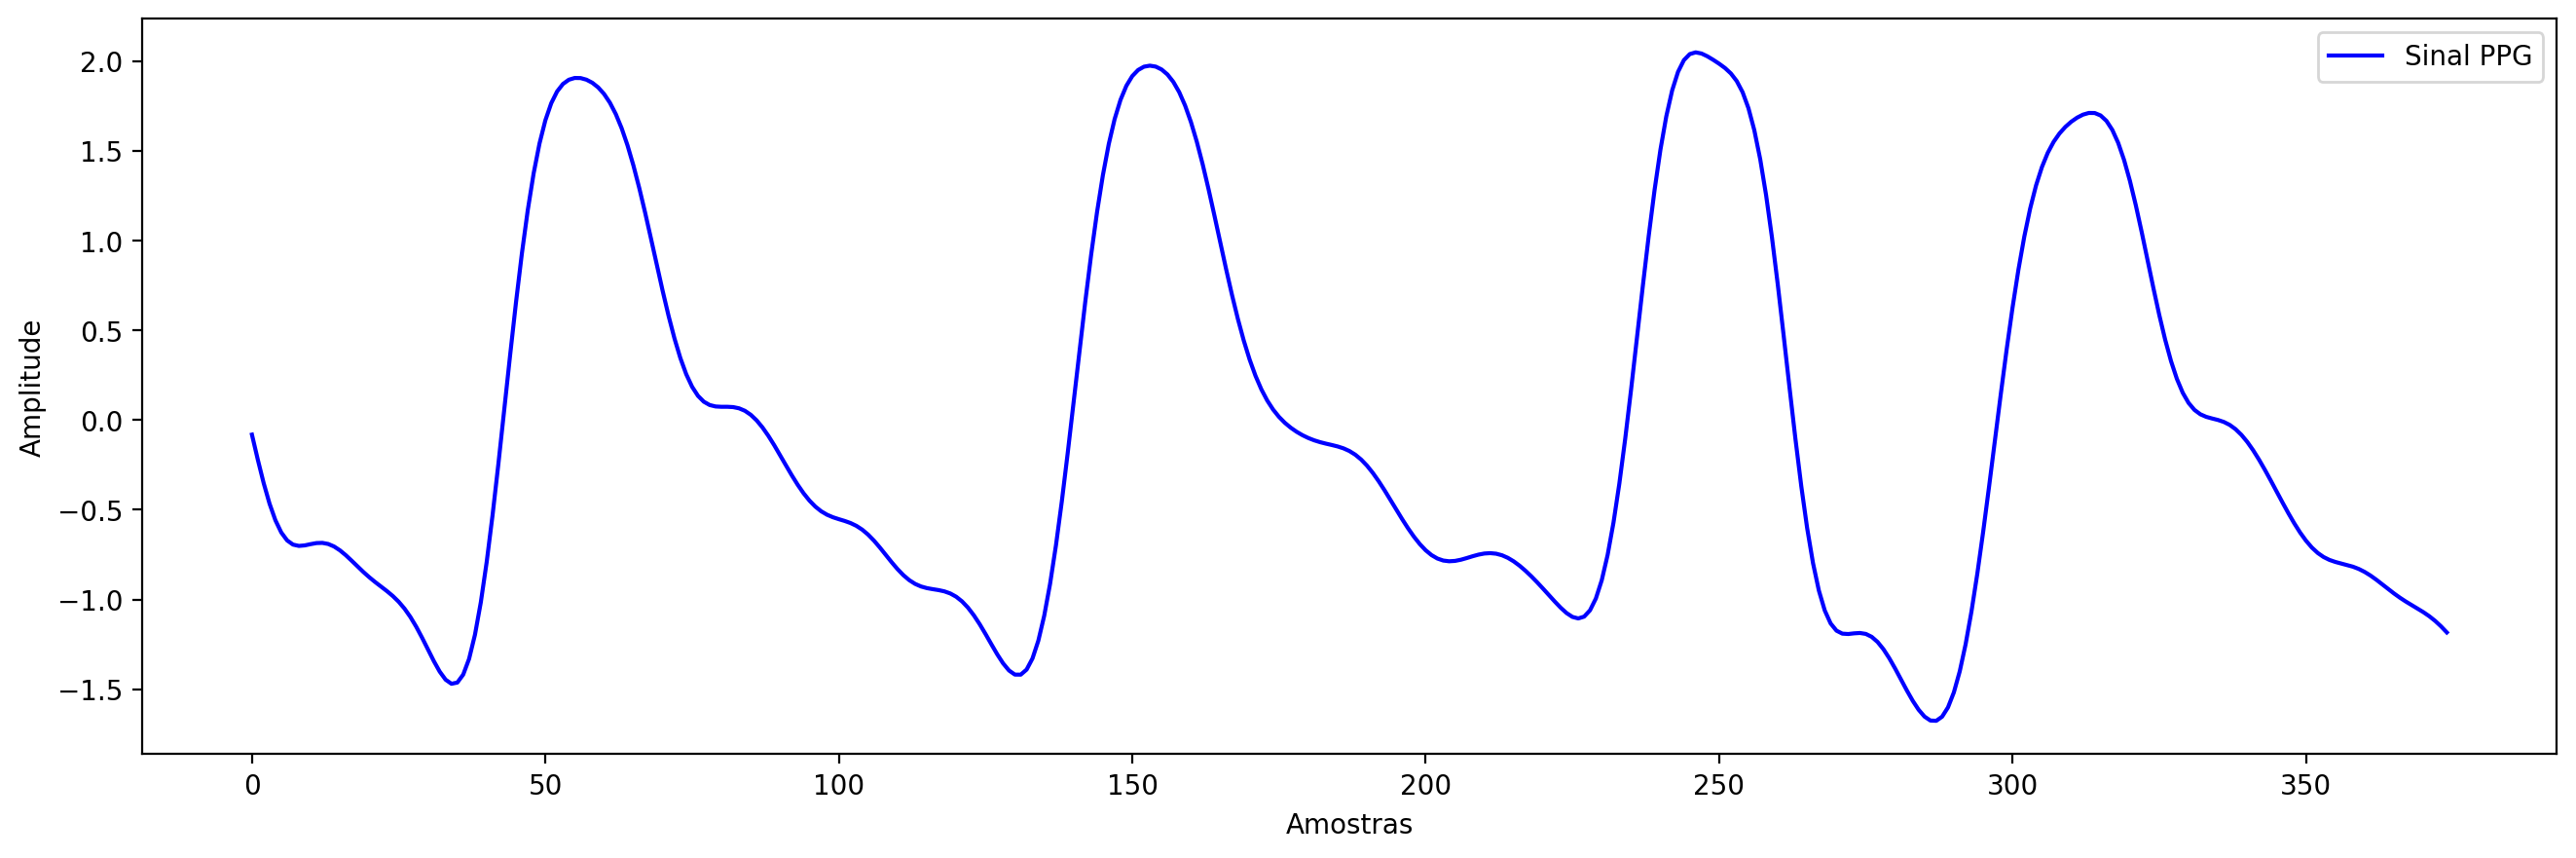

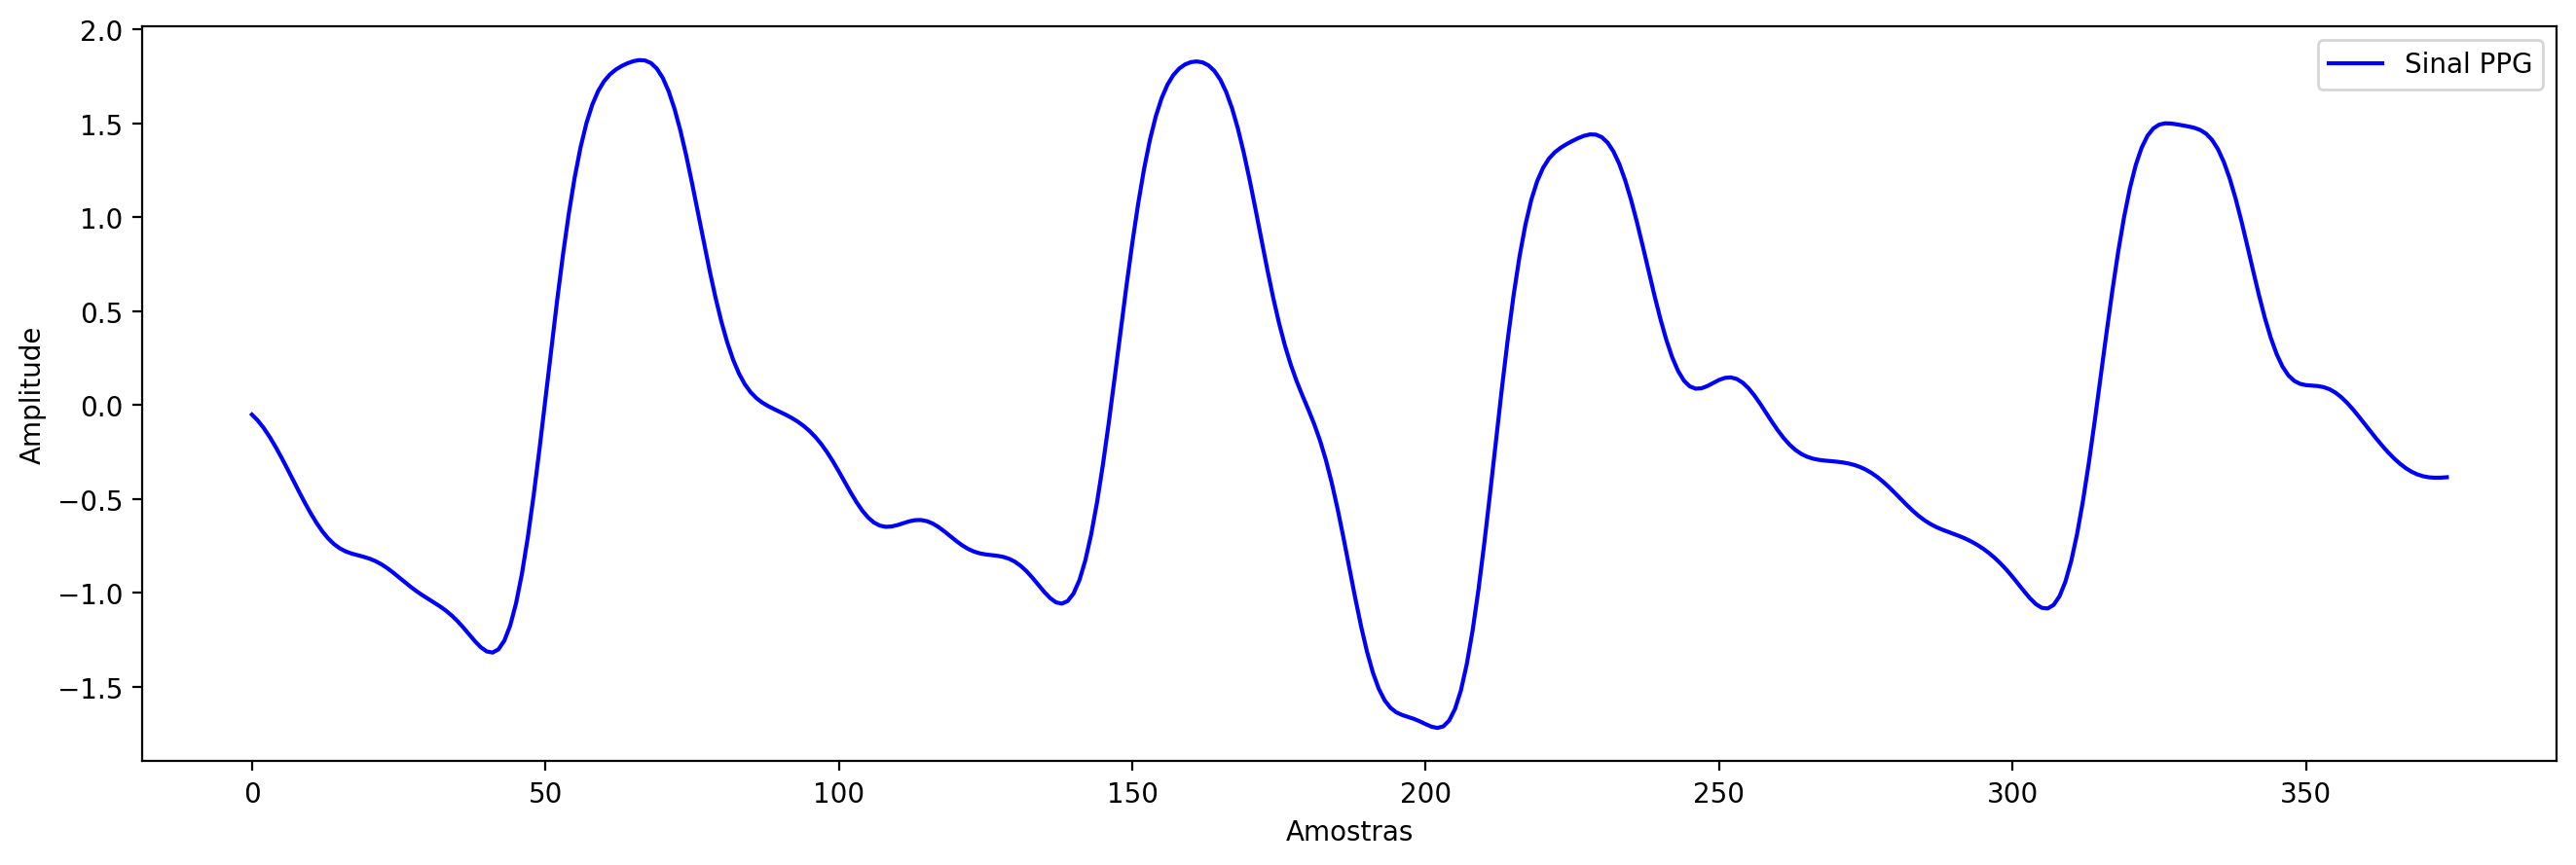

In [98]:
plot_ppg(df_final['PPG_Seg'][1][0]) # primeiro segmento
plot_ppg(df_final['PPG_Seg'][1][1]) # segundo segmento

In [99]:
def plot_sinais_ppg(ppg, reamostrado=None, ppg_butther=None, inicio=0, fim=250):
    '''
    Just plot the signals.
    
        Parameters:
            ppg (dict): {'sinal': d2, 'titulo':'PPG\'\' DIFF'},
            reamostrado (dict): {'sinal': dv2, 'titulo':'PPG\'\' GRADIENT'} 
            ppg_butther (dict): {'sinal': dv2, 'titulo':'PPG\'\' GRADIENT'} 
            inicio (int): valor inicial da plotagem
            fim (int): valor final da plotagem
    '''
    fig, ax = plt.subplots(3,1, figsize=(9,12), sharex=True)

    ax[0].set_title(ppg['titulo'], fontsize=16)
    ax[0].set_ylabel('Valor Sinal')
    ax[0].plot(ppg['sinal'][inicio:4*fim])

    ax[1].set_title(reamostrado['titulo'], fontsize=16)
    ax[1].set_ylabel('Valor Sinal')
    ax[1].set_xlabel('Amostra')
    ax[1].plot(reamostrado['sinal'][inicio:fim])
    
    ax[2].set_title(ppg_butther['titulo'], fontsize=16)
    ax[2].set_ylabel('Valor Sinal')
    ax[2].set_xlabel('Amostra')
    ax[2].plot(ppg_butther['sinal'][inicio:fim])
    plt.show()

##### 2.4.4 Reordenando as apresentação das colunas

In [100]:
df_final.columns

Index(['Subject_ID', 'PPG', 'label', 'PPG_re', 'PPG_butter', 'PPG_Seg'], dtype='object')

In [101]:
df_final = df_final[['Subject_ID', 'PPG', 'PPG_re', 'PPG_butter', 'PPG_Seg', 'label']]
df_final.head()

,Subject_ID,PPG,PPG_re,PPG_butter,PPG_Seg,label
0,2,"[2438.0, 2438.0, 2438.0, 2455.0, 2455.0, 2384....","[2213.7846332140125, 2456.539814661412, 2357.4...","[34.0966101593838, 72.09079617241342, 105.9992...","[[0.1928954777874841, 0.4029759359982858, 0.59...",Stage 2 hypertension
1,3,"[1973.0, 1973.0, 1990.0, 1990.0, 1979.0, 1979....","[1991.1495405900525, 1969.2166038703729, 1966....","[-4.236941968623845, -10.472358870428755, -16....","[[-0.08104548375299932, -0.22049051993397756, ...",Stage 2 hypertension
2,6,"[2003.0, 2003.0, 1978.0, 1978.0, 1978.0, 1993....","[2070.393256046045, 1971.5884271591292, 1995.2...","[4.783050805797863, -13.950867831397167, -31.2...","[[0.09466057110358737, -0.21145073307564655, -...",Normal
3,8,"[2039.0, 2039.0, 2039.0, 2029.0, 2029.0, 2042....","[2032.8301164967734, 2033.3854553035292, 2034....","[-9.52317327379029, -11.391753761103871, -13.3...","[[-0.1607329430700568, -0.19327538453269014, -...",Prehypertension
4,9,"[1961.0, 1971.0, 1971.0, 1971.0, 1964.0, 1964....","[1963.904065698714, 1978.6419080767303, 1985.1...","[-9.014673188649088, -8.418368308748565, -8.01...","[[-0.2162742306986529, -0.20137874649776444, -...",Prehypertension


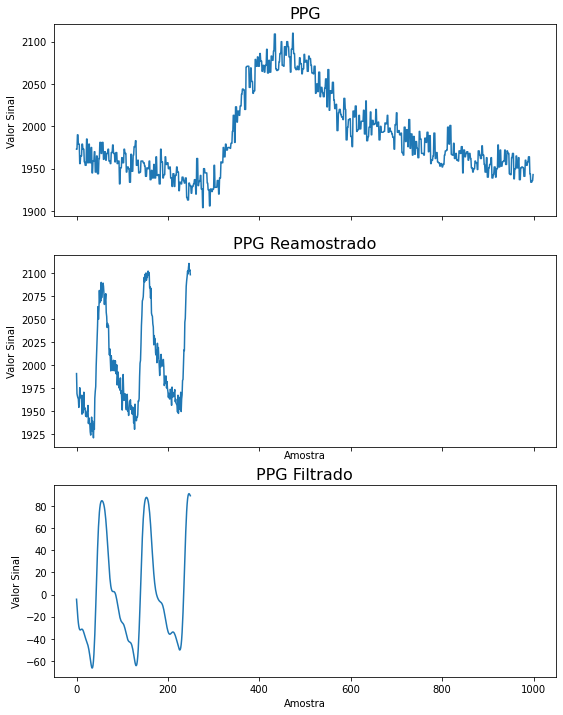

In [102]:
plot_sinais_ppg({'sinal': df_final.PPG[1], 'titulo':'PPG'}, \
                    {'sinal': df_final.PPG_re[1], 'titulo':'PPG Reamostrado'}, \
                    {'sinal': df_final.PPG_butter[1], 'titulo':'PPG Filtrado'}, \
                    0, 250)

#### 2.5 Particionamento dos dados

É comum a maioria dos trabalhos em *health* separarem a base de forma aleatória.

In [103]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [104]:
df_final.Subject_ID.values

array([  2,   3,   6,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  21,  22,  23,  24,  25,  26,  27,  29,  30,  31,  32,
        34,  35,  38,  40,  41,  43,  45,  47,  48,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  60,  61,  62,  63,  64,  65,  66,  67,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  95,  96,
        97,  98,  99, 100, 103, 104, 105, 106, 107, 108, 110, 111, 112,
       113, 114, 115, 116, 119, 120, 122, 123, 124, 125, 126, 127, 128,
       130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145,
       146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160,
       161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174,
       175, 176, 178, 179, 180, 182, 183, 184, 185, 186, 188, 189, 190,
       191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 226, 227, 228, 229, 230, 231, 23

In [105]:
list_ids_train, list_ids_test  = train_test_split(df_final.Subject_ID.values , test_size=0.30, random_state=42)
list_ids_train, list_ids_test

(array([213,  97, 154, 239, 229,  43,  17,  50,  38,  57, 122, 206, 256,
         67, 183, 228, 111,  56, 227, 113, 214,  34, 196, 158, 172,   6,
        112,  62, 178, 161, 128, 123, 195, 139,  51, 169,  92,  29, 191,
        405,  47,  16, 414, 224,  11,  35, 182, 411, 199,   9,  45, 162,
        209, 170, 251, 157,  15,  93, 173, 210, 232,   2, 252, 223, 104,
        237,  96,  60, 190,  55, 167,  30, 215, 244, 116,  54, 235,  63,
        135, 218,  58, 193, 407,   8, 148,  84, 179, 253, 221, 403,  65,
        115,  48,  12, 153, 130, 120, 248, 254, 127,  13,  18,  90, 246,
        176,  23, 217, 106, 247, 180, 233, 257,  95,  85, 150,  66, 226,
        416, 220,  89,  64, 126,  27,  88, 211, 412, 241, 245, 174,  52,
        208, 406,   3,  83, 198, 175, 200, 145, 140, 160, 125, 259, 108,
        165, 419,  26, 242, 105, 149,  19, 131, 231, 144]),
 array([205, 134, 417, 418,  21, 146, 222, 409, 110, 189, 138,  41, 243,
         14,  99, 230, 234,  24, 207,  98, 413, 136, 164,  32, 4

In [106]:
list_ids_test, list_ids_valid  = train_test_split(list_ids_test, test_size=0.5, random_state=42)
list_ids_test, list_ids_valid

(array([230,  22, 216, 415, 152,  41, 171,  10, 155, 184, 203, 192, 137,
        134, 136, 417, 219, 141, 151,  31,  32,  40, 138, 164, 207, 103,
        188, 413, 100, 409, 163,  99,  53]),
 array([166, 185, 205, 212, 146,  87, 234, 243, 201, 186, 250, 189, 240,
         14, 107, 197, 418,  24, 124, 110, 222,  61,  21, 142, 119,  98,
         25,  91, 404, 410,  86, 114, 156]))

##### Visualizando a distribuição para treino, teste e validação

In [107]:
list_dfs = []
for subj in list_ids_train:
  list_dfs.append(df_final[df_final['Subject_ID'] == subj])

df_train = pd.concat(list_dfs)
df_train.shape

(153, 6)

In [108]:
df_train.label.value_counts()

Prehypertension         60
Normal                  56
Stage 1 hypertension    24
Stage 2 hypertension    13
Name: label, dtype: int64

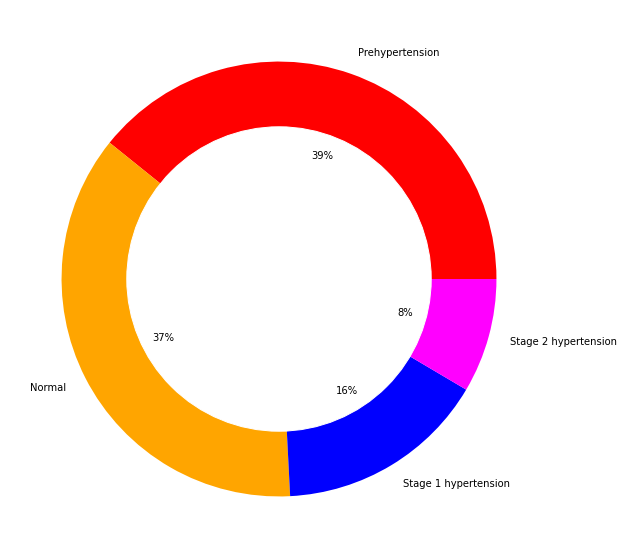

In [109]:
plt.figure(figsize= (10,10))
circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(df_train.label.value_counts(), labels=['Prehypertension','Normal','Stage 1 hypertension','Stage 2 hypertension'], \
                                              autopct = '%0.0f%%', colors = ['red','orange','blue','magenta'])
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [110]:
list_dfs = []
for subj in list_ids_test:
  list_dfs.append(df_final[df_final['Subject_ID'] == subj])

df_test = pd.concat(list_dfs)
df_test.shape

(33, 6)

In [111]:
df_test.label.value_counts()

Prehypertension         14
Normal                  11
Stage 1 hypertension     6
Stage 2 hypertension     2
Name: label, dtype: int64

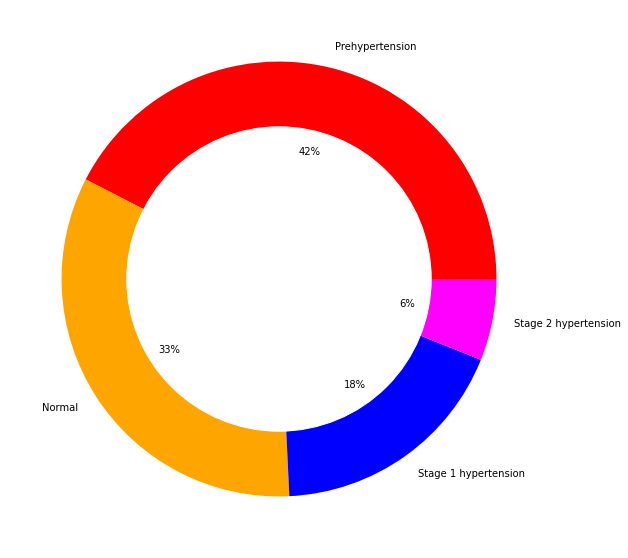

In [112]:
plt.figure(figsize= (10,10))
circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(df_test.label.value_counts(), labels=['Prehypertension','Normal','Stage 1 hypertension','Stage 2 hypertension'], \
                                              autopct = '%0.0f%%', colors = ['red','orange','blue','magenta'])
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [113]:
list_dfs = []
for subj in list_ids_valid:
  list_dfs.append(df_final[df_final['Subject_ID'] == subj])

df_valid = pd.concat(list_dfs)
df_valid.shape

(33, 6)

In [114]:
df_valid.label.value_counts()

Normal                  13
Prehypertension         11
Stage 2 hypertension     5
Stage 1 hypertension     4
Name: label, dtype: int64

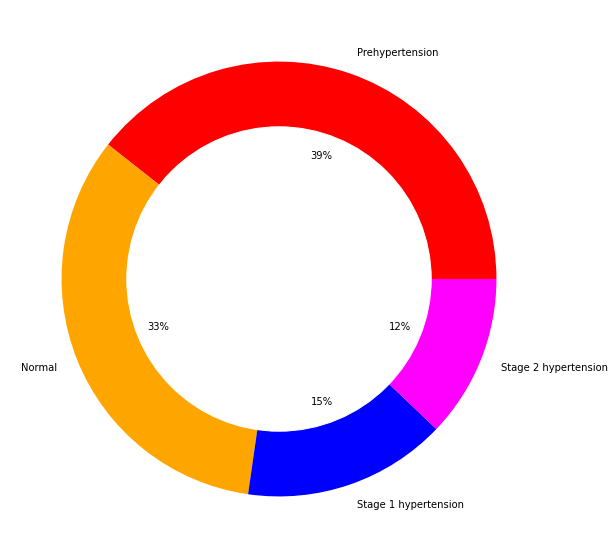

In [115]:
plt.figure(figsize= (10,10))
circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(df_valid.label.value_counts(), labels=['Prehypertension','Normal','Stage 1 hypertension','Stage 2 hypertension'], \
                                              autopct = '%0.0f%%', colors = ['red','orange','blue','magenta'])
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

#### 2.6 OneHotEncoding

#### **Neste exemplo, vocês lembram quais seriam nossos rótulos?**

In [116]:
df_final.label

0      Stage 2 hypertension
1      Stage 2 hypertension
2                    Normal
3           Prehypertension
4           Prehypertension
               ...         
214                  Normal
215                  Normal
216         Prehypertension
217                  Normal
218                  Normal
Name: label, Length: 219, dtype: object

In [117]:
df_final.label.value_counts()

Prehypertension         85
Normal                  80
Stage 1 hypertension    34
Stage 2 hypertension    20
Name: label, dtype: int64

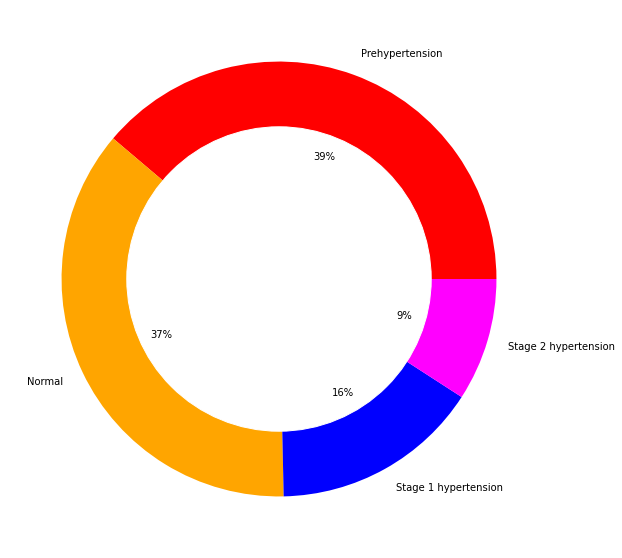

In [118]:
plt.figure(figsize= (10,10))
circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(df_final.label.value_counts(), labels=['Prehypertension','Normal','Stage 1 hypertension','Stage 2 hypertension'], \
                                              autopct = '%0.0f%%', colors = ['red','orange','blue','magenta'])
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

#### Pra facilitar a vida do processador, precisaremos converter cada categoria da coluna label num valor numérico 

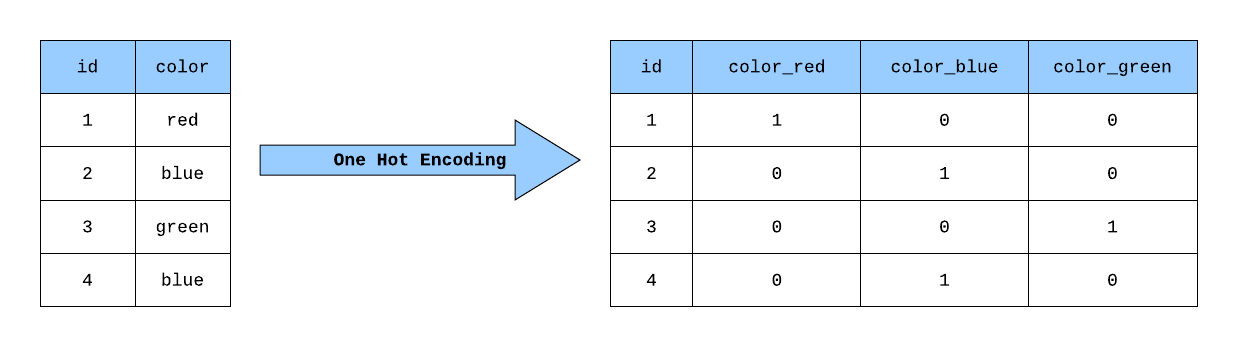

In [119]:
# Codificação dos inteiros
label_encoder = LabelEncoder()
int_encoded = label_encoder.fit_transform(df_final.label.values)
print(int_encoded)

[3 3 0 1 1 1 1 0 0 0 1 1 0 0 0 3 1 0 0 3 1 0 1 3 3 0 1 2 2 0 0 2 3 1 2 2 3
 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 3 0 2 3 3 1 0 1 0 1 3 2 1 2 0 1 2 1 1 1 1 0
 1 1 3 3 1 1 0 0 0 2 1 1 0 3 0 0 1 1 0 1 3 1 1 2 2 2 1 1 1 0 1 0 0 1 1 0 1
 2 3 1 2 0 1 0 2 0 0 0 1 0 2 1 2 0 0 1 1 0 2 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1
 3 2 1 0 2 1 2 1 2 2 1 2 0 2 2 1 1 2 1 2 2 3 1 0 1 0 1 1 3 0 0 1 1 2 1 0 1
 1 2 1 1 1 1 1 0 0 0 1 1 2 2 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [120]:
# Codificação do tipo OneHotEncoder
onehot = OneHotEncoder(sparse=False)
integer_encoded = int_encoded.reshape(len(int_encoded), 1)
onehot_encoded = onehot.fit_transform(integer_encoded)
onehot_encoded

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],


In [121]:
# invert first example
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
inverted

array(['Stage 2 hypertension'], dtype=object)

##### oooooooooooou, podemos utilizar o próprio Pandas

In [122]:
dummy = pd.get_dummies(df_final.label)
dummy

,Normal,Prehypertension,Stage 1 hypertension,Stage 2 hypertension
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
214,1,0,0,0
215,1,0,0,0
216,0,1,0,0
217,1,0,0,0


In [123]:
# concatena pela coluna
df_final = pd.concat([df_final, dummy], axis=1)
df_final.head()

,Subject_ID,PPG,PPG_re,PPG_butter,PPG_Seg,label,Normal,Prehypertension,Stage 1 hypertension,Stage 2 hypertension
0,2,"[2438.0, 2438.0, 2438.0, 2455.0, 2455.0, 2384....","[2213.7846332140125, 2456.539814661412, 2357.4...","[34.0966101593838, 72.09079617241342, 105.9992...","[[0.1928954777874841, 0.4029759359982858, 0.59...",Stage 2 hypertension,0,0,0,1
1,3,"[1973.0, 1973.0, 1990.0, 1990.0, 1979.0, 1979....","[1991.1495405900525, 1969.2166038703729, 1966....","[-4.236941968623845, -10.472358870428755, -16....","[[-0.08104548375299932, -0.22049051993397756, ...",Stage 2 hypertension,0,0,0,1
2,6,"[2003.0, 2003.0, 1978.0, 1978.0, 1978.0, 1993....","[2070.393256046045, 1971.5884271591292, 1995.2...","[4.783050805797863, -13.950867831397167, -31.2...","[[0.09466057110358737, -0.21145073307564655, -...",Normal,1,0,0,0
3,8,"[2039.0, 2039.0, 2039.0, 2029.0, 2029.0, 2042....","[2032.8301164967734, 2033.3854553035292, 2034....","[-9.52317327379029, -11.391753761103871, -13.3...","[[-0.1607329430700568, -0.19327538453269014, -...",Prehypertension,0,1,0,0
4,9,"[1961.0, 1971.0, 1971.0, 1971.0, 1964.0, 1964....","[1963.904065698714, 1978.6419080767303, 1985.1...","[-9.014673188649088, -8.418368308748565, -8.01...","[[-0.2162742306986529, -0.20137874649776444, -...",Prehypertension,0,1,0,0


#### 2.7 Criação dos conjuntos de X_train[test, valid] e y_train[test, valid]  

##### 2.7.1 montando o *train*

In [124]:
df = df_final[df_final['Subject_ID'] == 111]
df['PPG_Seg']

76    [[0.42577069235615406, 0.30291287144671525, 0....
Name: PPG_Seg, dtype: object

In [125]:
df['PPG_Seg'].values[0][1]
df[['Normal','Prehypertension', 'Stage 1 hypertension',	'Stage 2 hypertension']].values[0]

array([0, 0, 0, 1], dtype=uint8)

In [126]:
X_train = []
y_train = []

list_X_train, list_y_train = [], []
for subject in list_ids_train:
  df = df_final[df_final['Subject_ID'] == subject]
  X_train.append(df['PPG_Seg'].values[0][0]) # para acessar o primeiro segmento
  y_train.append(df[['Normal','Prehypertension', 'Stage 1 hypertension',	'Stage 2 hypertension']].values[0])
  X_train.append(df['PPG_Seg'].values[0][1]) # para acessar o segundo segmento
  y_train.append(df[['Normal','Prehypertension', 'Stage 1 hypertension',	'Stage 2 hypertension']].values[0])

In [127]:
X_train, y_train = np.asarray(X_train), np.asarray(y_train)
X_train.shape, y_train.shape

((306, 375), (306, 4))

##### 2.7.2 montando o *test*

In [128]:
X_test = []
y_test = []

for subject in list_ids_test:
  df = df_final[df_final['Subject_ID'] == subject]
  X_test.append(df['PPG_Seg'].values[0][0]) # para acessar o primeiro segmento
  y_test.append(df[['Normal','Prehypertension', 'Stage 1 hypertension',	'Stage 2 hypertension']].values[0])
  X_test.append(df['PPG_Seg'].values[0][1]) # para acessar o segundo segmento
  y_test.append(df[['Normal','Prehypertension', 'Stage 1 hypertension',	'Stage 2 hypertension']].values[0])

In [129]:
X_test, y_test = np.asarray(X_test), np.asarray(y_test)
X_test.shape, y_test.shape

((66, 375), (66, 4))

##### 2.7.3 montando o *valid*

In [130]:
X_valid = []
y_valid = []

for subject in list_ids_valid:
  df = df_final[df_final['Subject_ID'] == subject]
  X_valid.append(df['PPG_Seg'].values[0][0]) # para acessar o primeiro segmento
  y_valid.append(df[['Normal','Prehypertension', 'Stage 1 hypertension',	'Stage 2 hypertension']].values[0])
  X_valid.append(df['PPG_Seg'].values[0][1]) # para acessar o segundo segmento
  y_valid.append(df[['Normal','Prehypertension', 'Stage 1 hypertension',	'Stage 2 hypertension']].values[0])

In [131]:
X_valid, y_valid = np.asarray(X_valid), np.asarray(y_valid)
X_valid.shape, y_valid.shape

((66, 375), (66, 4))

# 3. Pré-processamento com Imagens

## 1. Preparação - Base de Imagens
Vamos assumir que queremos trabalhar com dados do tipo image e com seguinte problema: Reconhecimento de Expressões Faciais

O dataset selecionado é: [KDEF - The Karolinska Directed Emotional Faces](https://www.kdef.se/home/aboutKDEF.html)

**Department of Clinical Neuroscience, Psychology section, Karolinska Institutet**

Resumo:

* Expressions: 7 (neutral, happy, angry, afraid, disgusted, sad, surprised).
* Angulos: 5 (full left profile, half left profile, straight, half right profile, full right profile).
* Participantes: 70 (35 homens and 35 mulheres).
* Idade: média 25 anos, entre 20 a 30 anos.
* Duas sessões de fotos
* Numero de imagens: 4900.
* Tamanho: 562 * 762 pixels.
* Resolução: 72*72 dpi.
* Colores: 16.7 million (32 bit).
* Size inflated: 1.6 Mb.
* Size compressed: approximately 122 kb (ranging from 85 to 158 kb).
* File format: JPEG.
* Compression quality: 94 %.


<div>
<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs12652-020-02845-8/MediaObjects/12652_2020_2845_Fig15_HTML.png" width="500"/>
</div>

<div>
<img src="https://www.researchgate.net/profile/Goma-Najah/publication/314193214/figure/fig5/AS:467819189018628@1488548194169/6-Sample-images-for-Anger-Surprise-expressions-of-KDEF-Database-from.png" width="400"/>
</div>


### Carregar os dados no Colab

Existem diferentes maneiras de carregar os dados no Colab:
* Fazer upload dos arquivos
* Habilitar o Google Driver para acessar os dados já armazenado
* Fazer o download utilizando comandos no Notebook


In [132]:
# URL do dataset original: https://www.kdef.se/download/KDEF_and_AKDEF.zip
# URL do dataset com somente os dados KDEF para o exemplo: https://drive.google.com/u/1/uc?id=1IF6gN21vd4SJqi5oguPaP_9FJl9hxJRW

In [133]:
# Para baixar o dataset original usar esse comando
!wget https://www.kdef.se/download/KDEF_and_AKDEF.zip && unzip -q KDEF_and_AKDEF.zip && rm KDEF_and_AKDEF.zip

--2021-06-18 21:55:34--  https://www.kdef.se/download/KDEF_and_AKDEF.zip
Resolving www.kdef.se (www.kdef.se)... 46.30.215.58, 2a02:2350:5:104:80d1:809b:4fd6:33af
Connecting to www.kdef.se (www.kdef.se)|46.30.215.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 524279485 (500M) [application/zip]
Saving to: ‘KDEF_and_AKDEF.zip’

KDEF_and_AKDEF.zip  100%[===================>] 499.99M  4.15MB/s    in 2m 4s   

2021-06-18 21:57:39 (4.03 MB/s) - ‘KDEF_and_AKDEF.zip’ saved [524279485/524279485]



In [ ]:
!gdown https://drive.google.com/uc?id=1DIJWWKJ-N0rXoJxyXNpSDdc40_GGMrOK && unzip -q KDEF_and_AKDEF.zip && rm KDEF_and_AKDEF.zip

Downloading...
From: https://drive.google.com/uc?id=1DIJWWKJ-N0rXoJxyXNpSDdc40_GGMrOK
To: /content/KDEF_and_AKDEF.zip
524MB [00:07, 74.3MB/s]
replace KDEF_and_AKDEF/AKDEF/FAFFL.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Leitura dos Metadados

Os metadados da base de dados estão contidos nos nomes dos arquivos de imagens.

Resumo obtido do site do dataset:


```
Exemplo: AF01ANFL.JPG

Letter 1: Session
A = series one
B = series two

Letter 2: Gender
F = female
M = male

Letter 3 & 4: Identity number
01 - 35

Letter 5 & 6: Expression
AF = afraid
AN = angry
DI = disgusted
HA = happy
NE = neutral
SA = sad
SU = surprised

Letter 7 & 8: Angle
FL = full left profile
HL = half left profile
S = straight
HR = half right profile
FR = full right profile

Extension: Picture format JPG = jpeg (Joint Photographic Experts Group)
```

In [ ]:
# Importando as bibliotecas
import os
import numpy as np
import pandas as pd
import cv2 # OpenCV
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
root_path = '/content/KDEF_and_AKDEF/KDEF'

In [ ]:
# Funções para ler os metadados
def get_file_names(path):
  all_files = []
  for (root,dirs,files) in os.walk(path, topdown=False):
    all_files += files
  return sorted(all_files)

def translate_label(label):
  if label == 'AF':
    return 'afraid'
  if label == 'AN':
    return 'angry'
  if label == 'DI':
    return 'disgusted'
  if label == 'HA':
    return 'happy'
  if label == 'NE':
    return 'neutral'
  if label == 'SA':
    return 'sad'
  if label == 'SU':
    return 'surprised'

def get_df_metadata_from_file_names(file_names):
  data_frame = pd.DataFrame()
  data_frame['file_name'] = file_names
  data_frame['dir'] = data_frame.apply(lambda row: row['file_name'][0:4], axis=1)
  data_frame['id_user'] = data_frame.apply(lambda row: row['file_name'][1:4], axis=1)
  data_frame['label'] = data_frame.apply(lambda row: translate_label(row['file_name'][4:6]), axis=1)
  return data_frame


In [ ]:
# Exibe a quantidade total de imagens
all_file_names = get_file_names(root_path)
print('Numero total de arquivos: '+str(len(all_file_names)))

In [ ]:
# amostra dos 5 primeiros
all_file_names[0:5]

Selecionar somente as imagens frontais. Para isso observar o **7º** caracter do filename.
```
Letter 7 & 8: Angle
FL = full left profile
HL = half left profile
S = straight
HR = half right profile
FR = full right profile
```



In [ ]:
# filtra somente as imagens frontais
# 7º caracter é S
filtered_file_names = []
for file_name in all_file_names:
  if file_name[6]=='S':
    filtered_file_names.append(file_name)

# exibe os 5 primeiros da lista filtrada
filtered_file_names[0:5]

In [ ]:
# Extrai os metadados
data_frame = get_df_metadata_from_file_names(filtered_file_names)
data_frame

In [ ]:
# Agrupa por usuario
# São 14 imagens por usuario
data_frame.groupby('id_user').size().reset_index(name='counts')

In [ ]:
# Exige os dados para o usuarios F01
data_frame[data_frame['id_user'] == 'F01'].sort_values('label')

In [ ]:
# Verificar a distribuição de classes
data_frame.groupby('label').size().reset_index(name='counts')

## Preprocessamento

Tarefas: 

- Preprocessamento: Transformação para escala de cinza
- Preprocessamento: Transformações Rotate/Flip
- Preprocessamento: Crop utilizando um detector de face
- Preprocessamento: Resize (Uniforme aspect ratio)

Materiais:

- mpimg -  biblioteca do matplotlib
- Opencv - biblioteca de visão computacional


In [ ]:
# Como exemplo, selecionamos uma imagem
full_path_img1 = os.path.join(root_path, data_frame['dir'][0], data_frame['file_name'][0])
print(full_path_img1)

In [ ]:
# exibir uma imagem a partir do filename
im1 = mpimg.imread(full_path_img1)
print(im1.shape) #RGB

im1_R_channel = im1[:,:,0]
im1_G_channel = im1[:,:,1]
im1_B_channel = im1[:,:,2]


<div>
<img src="https://miro.medium.com/max/3074/1*ZPzv1Q9L-BN6L9X1Bi4OfA.png" width="500"/>
</div>

<div>
<img src="https://www.stt.eesc.usp.br/andre/palestras/CEFET-MG/_img/cuboRGB.png" width="300"/>
</div>


In [ ]:
# Exibir a imagem e os canais individuais
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(im1)
ax.set_title('RGB')

ax = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(im1_R_channel, cmap="gray")
ax.set_title('R')


ax = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(im1_G_channel, cmap="gray")
ax.set_title('G')


ax = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(im1_B_channel, cmap='gray')
ax.set_title('B')

plt.show()


Para mais informações sobre o mpimg:
```
# Ref: https://matplotlib.org/stable/tutorials/introductory/images.html
```



OpenCV

In [ ]:
# OpenCV - Carrengando imagem
im2 = cv2.imread(full_path_img1) #BGR
plt.imshow(im2)

In [ ]:
# Transformação BGR -> RGB
im2_color = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
# Transformação escala de cinza BGR -> GRAY
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(im2)
ax.set_title('BGR')

ax = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(im2_color)
ax.set_title('RGB')

ax = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(im2_gray, cmap='gray')
ax.set_title('GRAY')

plt.show()

Transformação Grayscale é uma média das intensidades de cada canal de cor

Grayscale = (R + G + B / 3)

In [ ]:
# Outras transformações em imagens
# Rotacionar
img_result = np.rot90(im2_gray) 
plt.imshow(img_result)

In [ ]:
# Outras transformações em imagens
# Flip horizontal
img_result = np.fliplr(im2_gray) 
plt.imshow(img_result)

Para mais informações:


```
# Ref: https://note.nkmk.me/en/python-opencv-numpy-rotate-flip/
```




### Recorte da Face

Nem toda informação na imagem é importante para treinar um classificador.
<div>
<img src="https://www.researchgate.net/profile/Phooi-Yee-Lau/publication/312357993/figure/fig4/AS:450802063024132@1484490995482/Face-Detection-and-Cropping.png"></div>



```
# Ref: https://www.researchgate.net/publication/312357993_Facial_Expression_Recognition_using_Correlation_of_Eyes_Regions
```



In [ ]:
!gdown https://raw.githubusercontent.com/AlexeyAB/OpenCV-detection-models/master/haarcascades/haarcascade_frontalface_default.xml

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

# Ref: https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php

<div><img src="https://www.researchgate.net/profile/Shih-Lien-Lu/publication/224141453/figure/fig1/AS:302892893392897@1449226701355/Face-detection-flow-based-on-the-Haar-classifier.png"></div>

In [ ]:
# Executa o detector
faces = face_cascade.detectMultiScale(im2_gray, 1.3, 5)
for (x,y,w,h) in faces:
    img_result = cv2.rectangle(im2.copy(),(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = im2_gray[y:y+h, x:x+w]
    roi_color = img_result[y:y+h, x:x+w]
    
faces # Resultado é os retangulos contendo faces

In [ ]:
# Exibir o resultado
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
ax.set_title('Original')

ax = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(roi_gray, cmap='gray')
ax.set_title('Recorte GRAY')

ax = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB))
ax.set_title('Recorte Color')

plt.show()
print(img_result.shape)
print(roi_gray.shape)
print(roi_color.shape)

### Redimensionamento

In [ ]:
dim = (300, 300)
resized = cv2.resize(roi_gray, dim, interpolation = cv2.INTER_AREA)
print(resized.shape)
plt.imshow(resized, cmap='gray')

Preprocessamento para uma imagem. Vamos automatizar para todas as imagens do dataset.

In [ ]:
def preprocessamento(list_full_path_file_names):

  result_list = []
  for i in range(0, len(list_full_path_file_names)):
    #read each img
    im = cv2.imread(list_full_path_file_names[i]) 
    #grayscale
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    #crop
    faces = face_cascade.detectMultiScale(im_gray, 1.3, 5)
    for (x,y,w,h) in faces:
      img_result = cv2.rectangle(im.copy(),(x,y),(x+w,y+h),(255,0,0),2)
      roi_color = img_result[y:y+h, x:x+w]

    #resize
    dim = (300, 300)
    resized = cv2.resize(roi_color, dim, interpolation = cv2.INTER_AREA)
    result_list.append(resized.copy())

  return result_list

In [ ]:
full_path_file_names = []
for index, row in data_frame.iterrows():
  full_path_file_names.append(os.path.join(root_path, row['dir'], row['file_name']))

full_path_file_names[203:207]

In [ ]:
# resultado = preprocessamento(full_path_file_names)
resultado = preprocessamento(full_path_file_names)
plt.imshow(cv2.cvtColor(resultado[200], cv2.COLOR_BGR2RGB))

### Serializar os dados

In [ ]:
np.save('./meus_dados.npy', resultado)

In [ ]:
deserializar = np.load('./meus_dados.npy')
plt.imshow(cv2.cvtColor(deserializar[1], cv2.COLOR_BGR2RGB))